In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from pandas.tools.plotting import scatter_matrix

df = pd.read_csv('MuRun2010B.csv')
df.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,146436,90830792,G,19.17120,3.817130,9.04323,-16.46730,9.81583,-1.289420,1.171390,...,T,5.43984,-0.362592,2.626990,-4.748490,2.65189,-1.345870,1.707960,1,2.73205
1,146436,90862225,G,12.94350,5.125790,-3.98369,-11.19730,6.49180,-1.313350,-0.660674,...,G,11.86360,4.789840,-6.262220,-8.864340,7.88403,-0.966622,-0.917841,1,3.10256
2,146436,90644850,G,12.39990,-0.849742,9.40110,8.04015,9.43943,0.772580,1.660940,...,G,8.55532,-4.851550,6.976960,-0.983229,8.49797,-0.115445,2.178410,-1,9.41149
3,146436,90678594,G,17.81320,-1.959590,2.80531,17.48110,3.42195,2.333500,2.180530,...,G,9.42174,4.365230,0.168017,8.347130,4.36846,1.403000,0.038471,1,7.74702
4,146436,90686690,G,7.95664,7.097000,-1.31646,3.34613,7.21806,0.448399,-0.183411,...,T,5.44467,-1.341760,1.386470,5.090250,1.92941,1.697380,2.339810,-1,8.67727


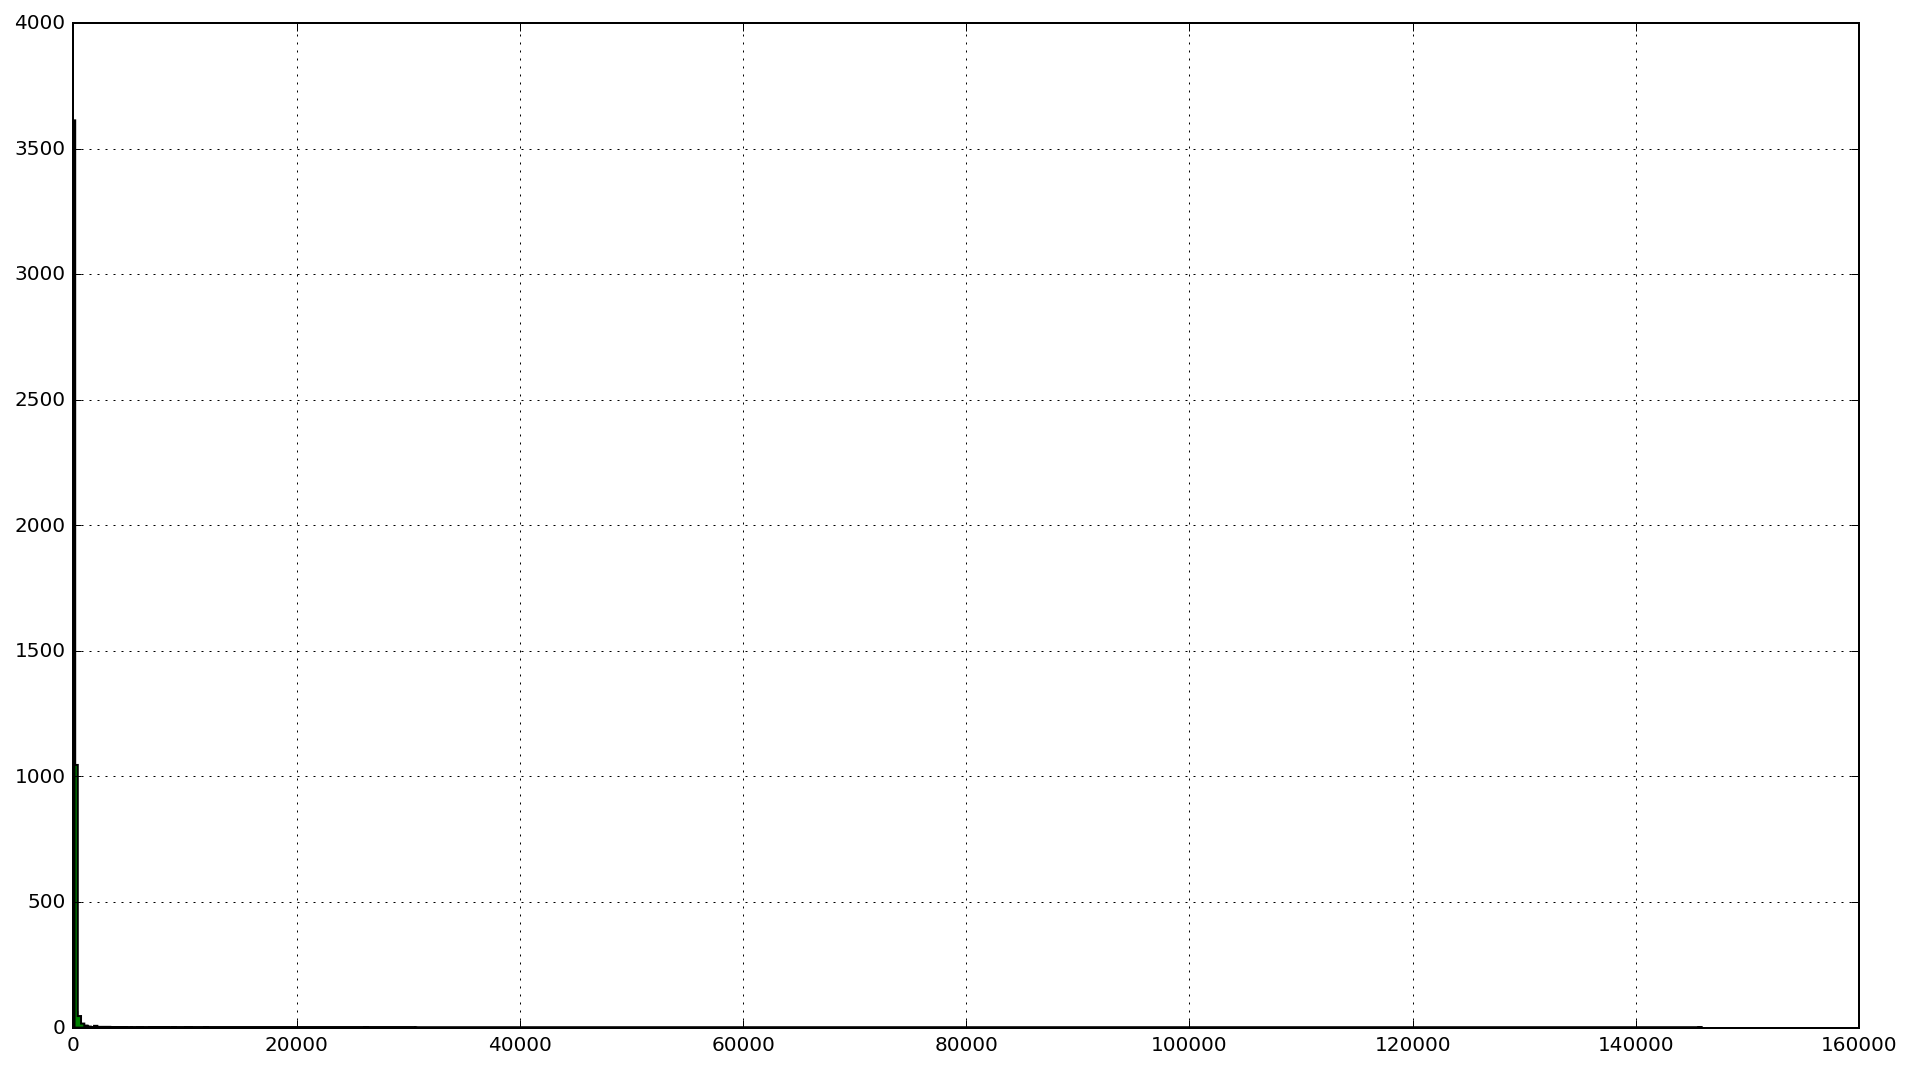

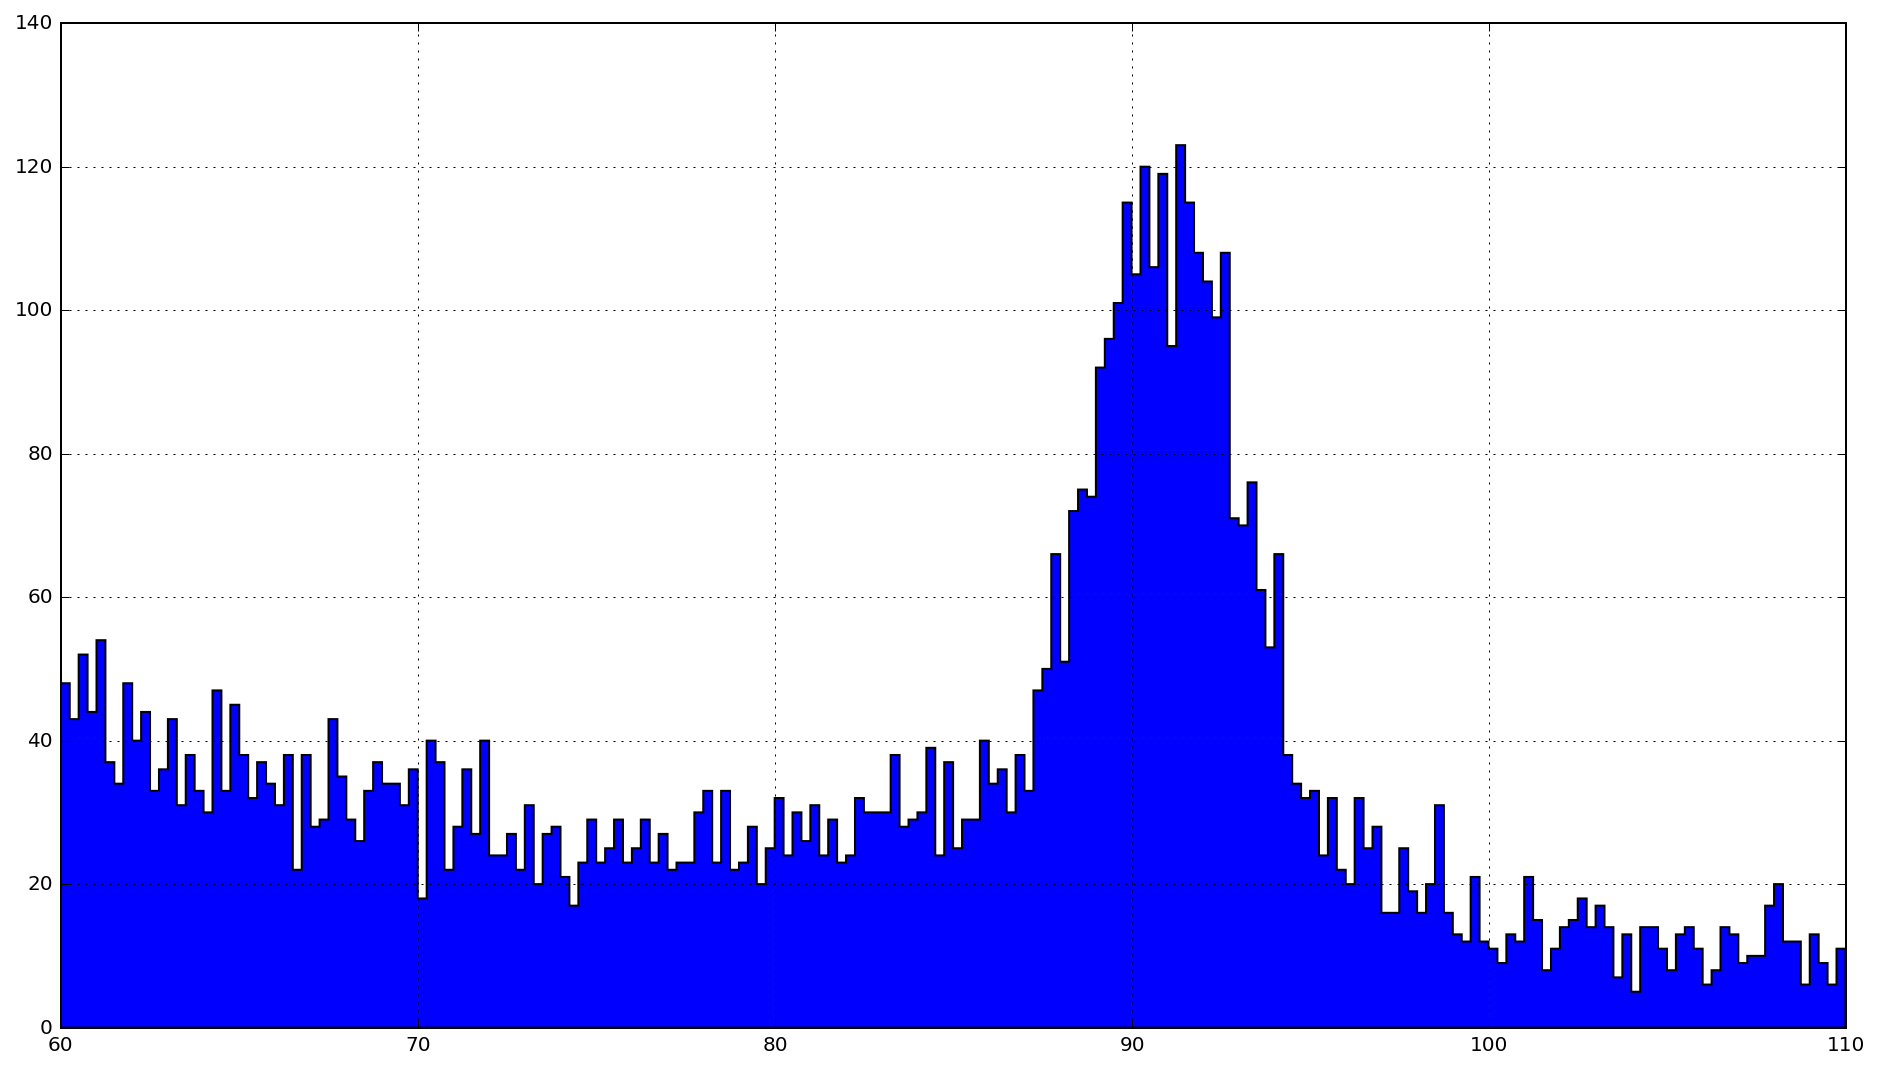

In [30]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
df[df.E1 > 100].E1.hist(bins=500,histtype=u'stepfilled')
df[df.E2 > 100].E2.hist(bins=500,histtype=u'stepfilled')

fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
df[df.M > 60].M.hist(bins=200,histtype=u'stepfilled')

In [31]:
muon = df[df.E1 < 100]
muon = muon[muon.E2 < 100]
muon = muon[abs(muon.px1) < 40]
muon = muon[abs(muon.px2) < 40]
muon = muon[abs(muon.py1) < 40]
muon = muon[abs(muon.py2) < 40]
muon = muon[abs(muon.pt1) < 40]
muon = muon[abs(muon.pt2) < 40]
muon = muon.drop(['Event','Run','Type1','Type2','Q1','Q2'],axis=1)
#muon
muon['mass1'] = np.sqrt(muon.E1**2 - muon.px1**2 - muon.py1**2 - muon.pz1**2)
muon['mass2'] = np.sqrt(muon.E2**2 - muon.px2**2 - muon.py2**2 - muon.pz2**2)

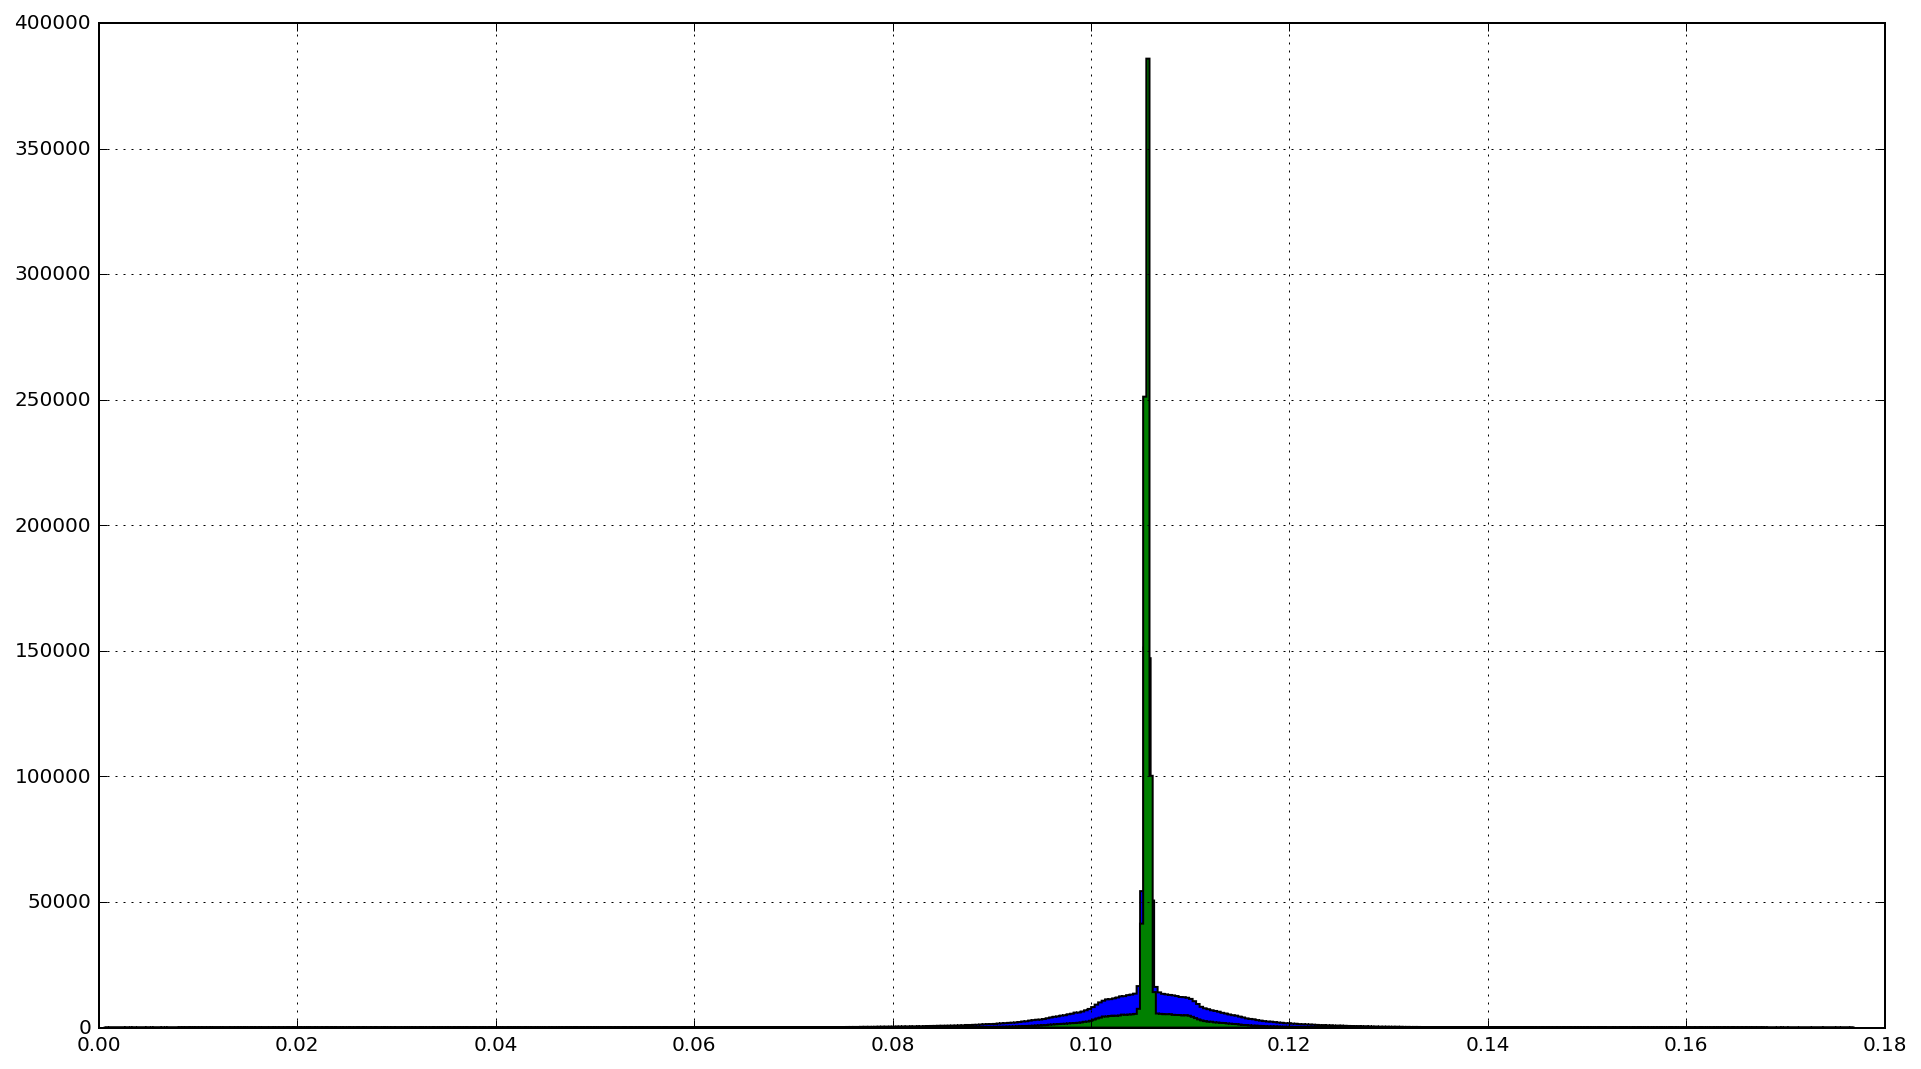

In [32]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon.mass1.hist(bins=500,histtype=u'stepfilled')
muon.mass2.hist(bins=500,histtype=u'stepfilled')

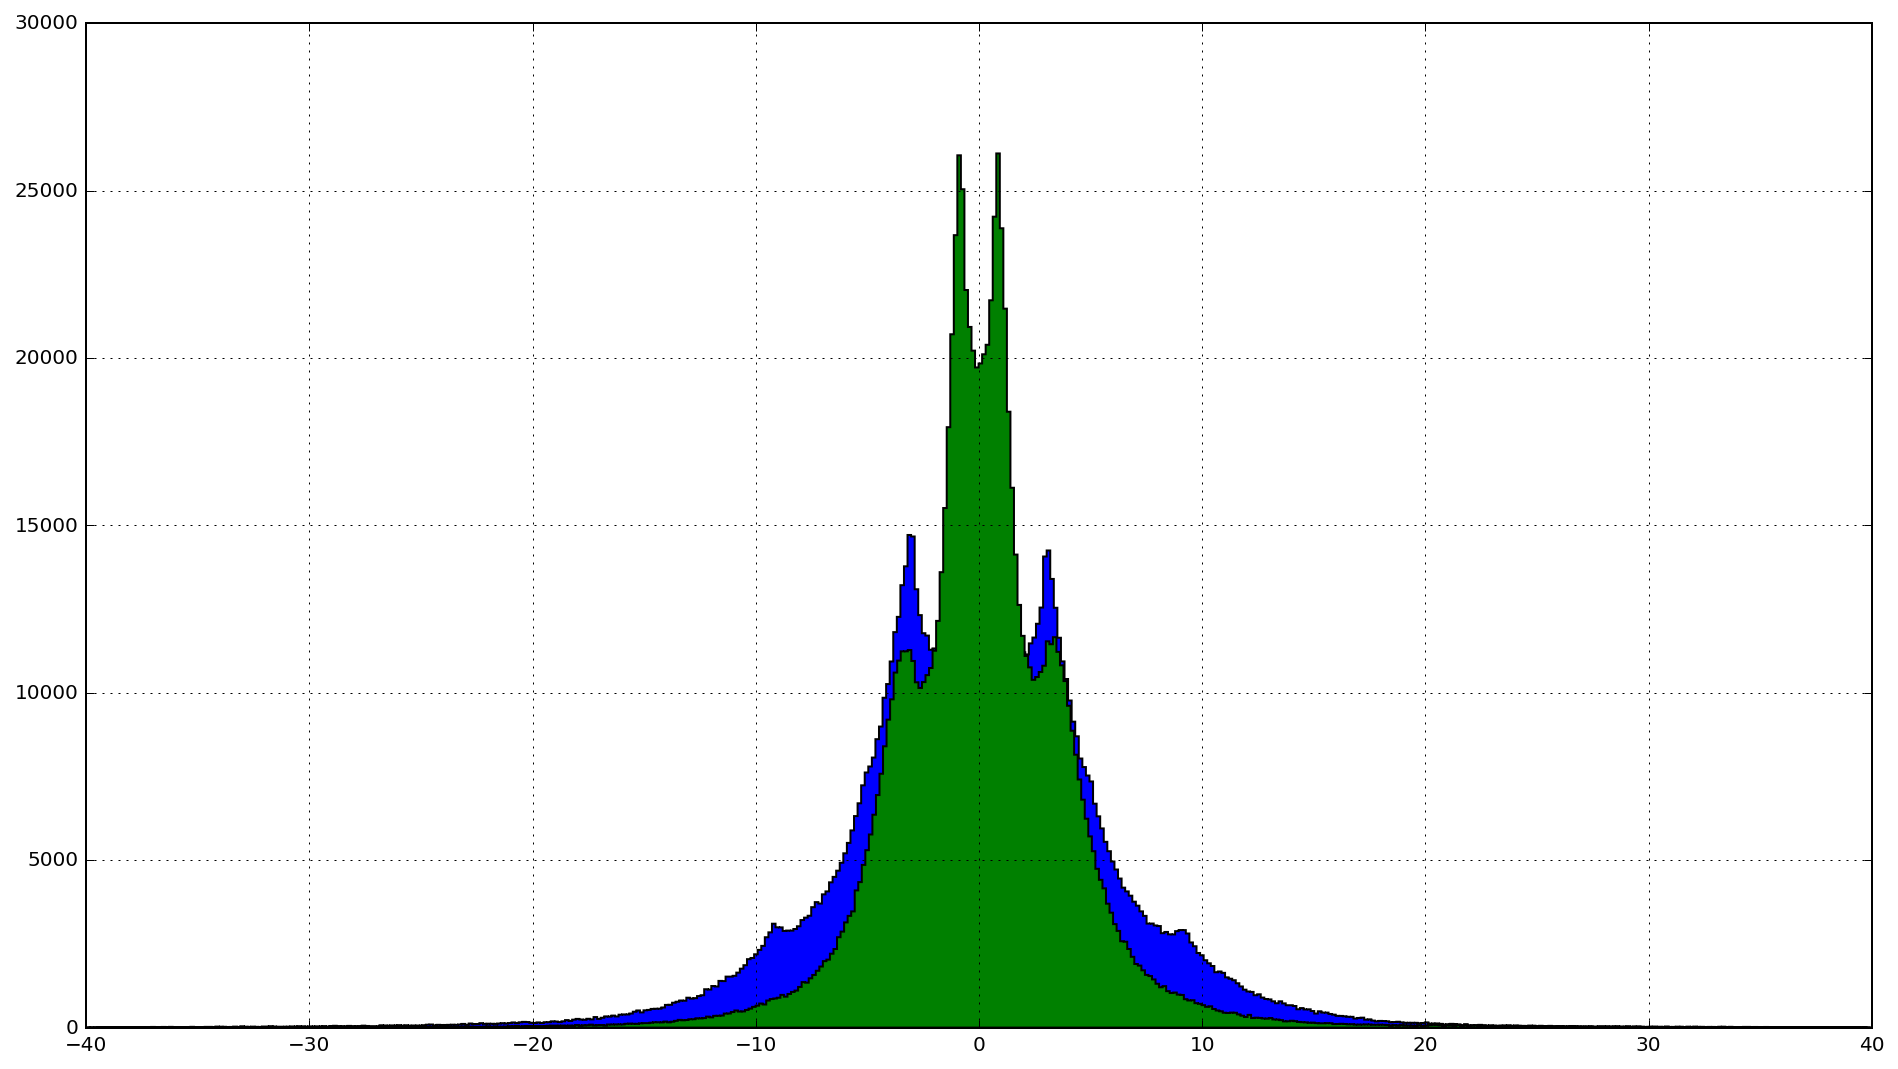

In [5]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon.py1.hist(bins=500,histtype=u'stepfilled')
muon.py2.hist(bins=500,histtype=u'stepfilled')

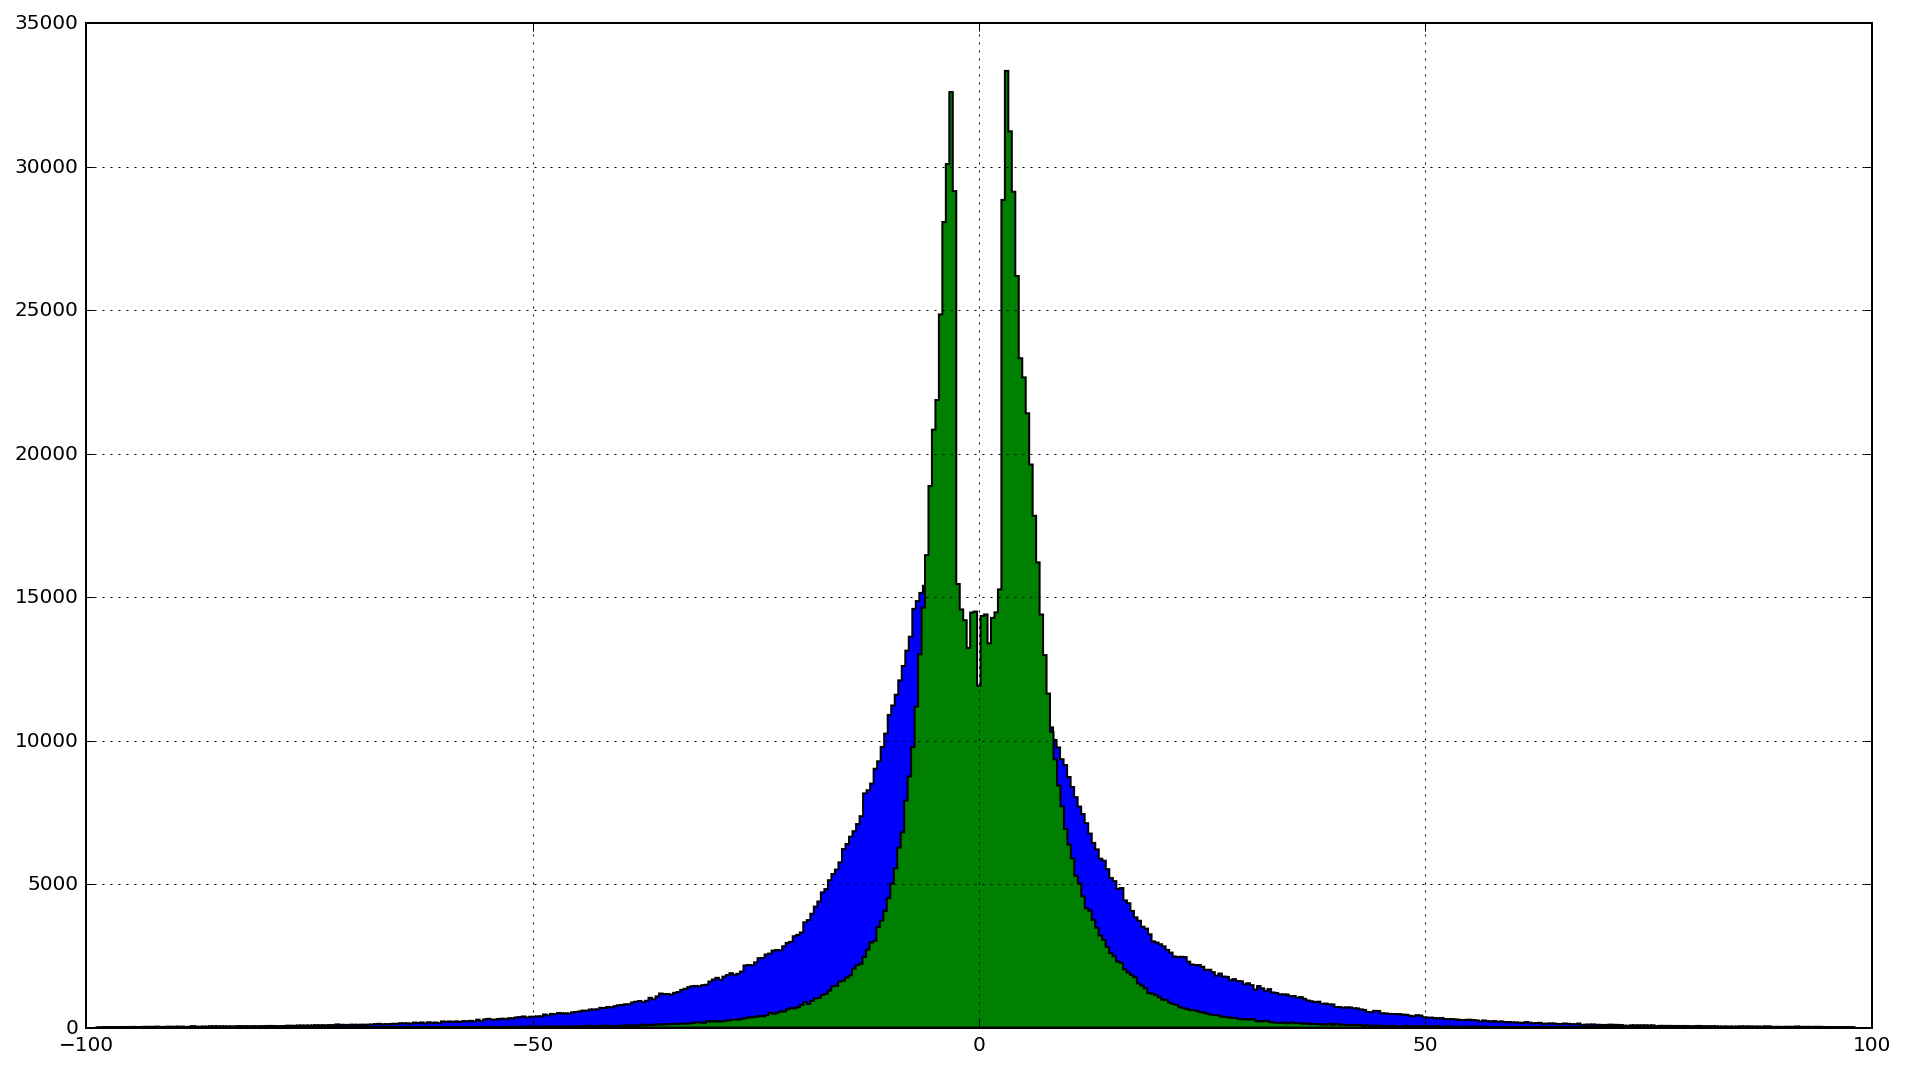

In [6]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon.pz1.hist(bins=500,histtype=u'stepfilled')
muon.pz2.hist(bins=500,histtype=u'stepfilled')

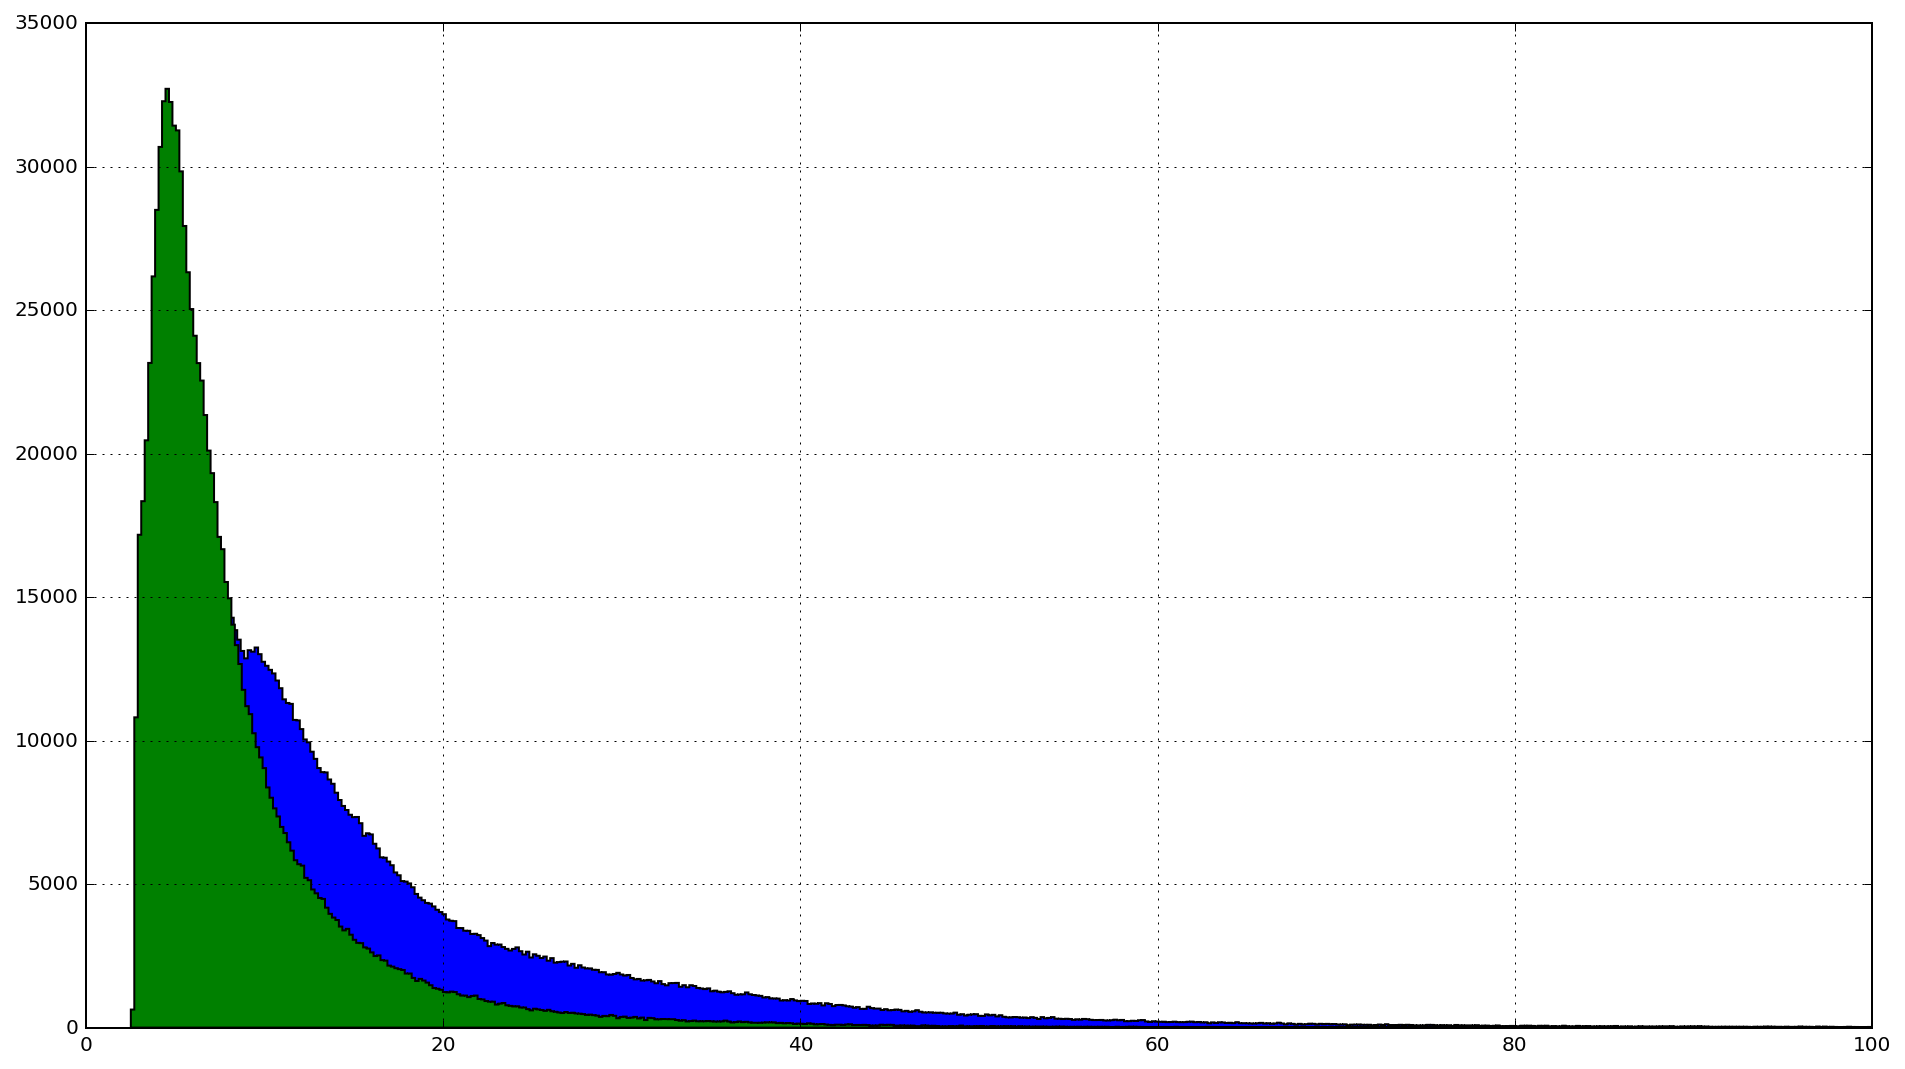

In [7]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon.E1.hist(bins=500,histtype=u'stepfilled')
muon.E2.hist(bins=500,histtype=u'stepfilled')

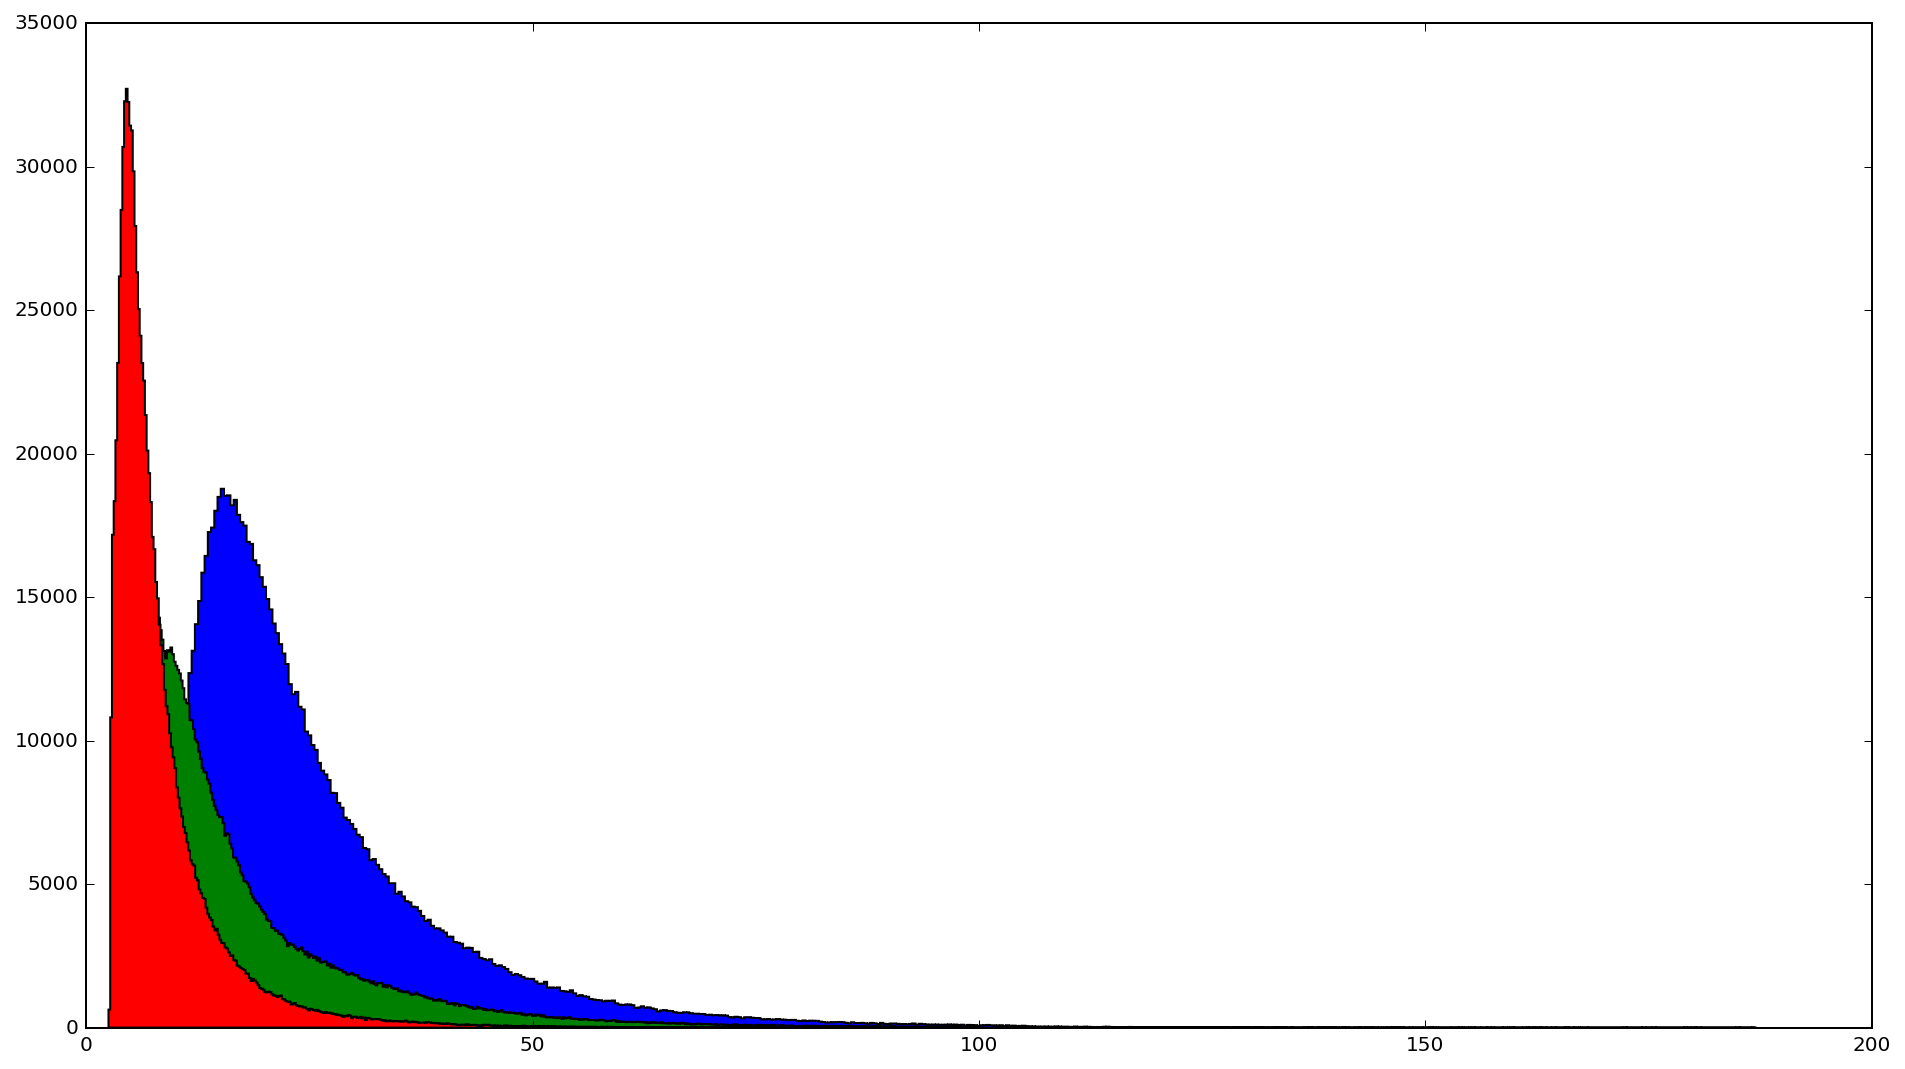

In [8]:
energy = muon.E1 + muon.E2
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist(energy,bins=500,histtype=u'stepfilled')
plt.hist(muon.E1,bins=500,histtype=u'stepfilled')
plt.hist(muon.E2,bins=500,histtype=u'stepfilled')
plt.show()

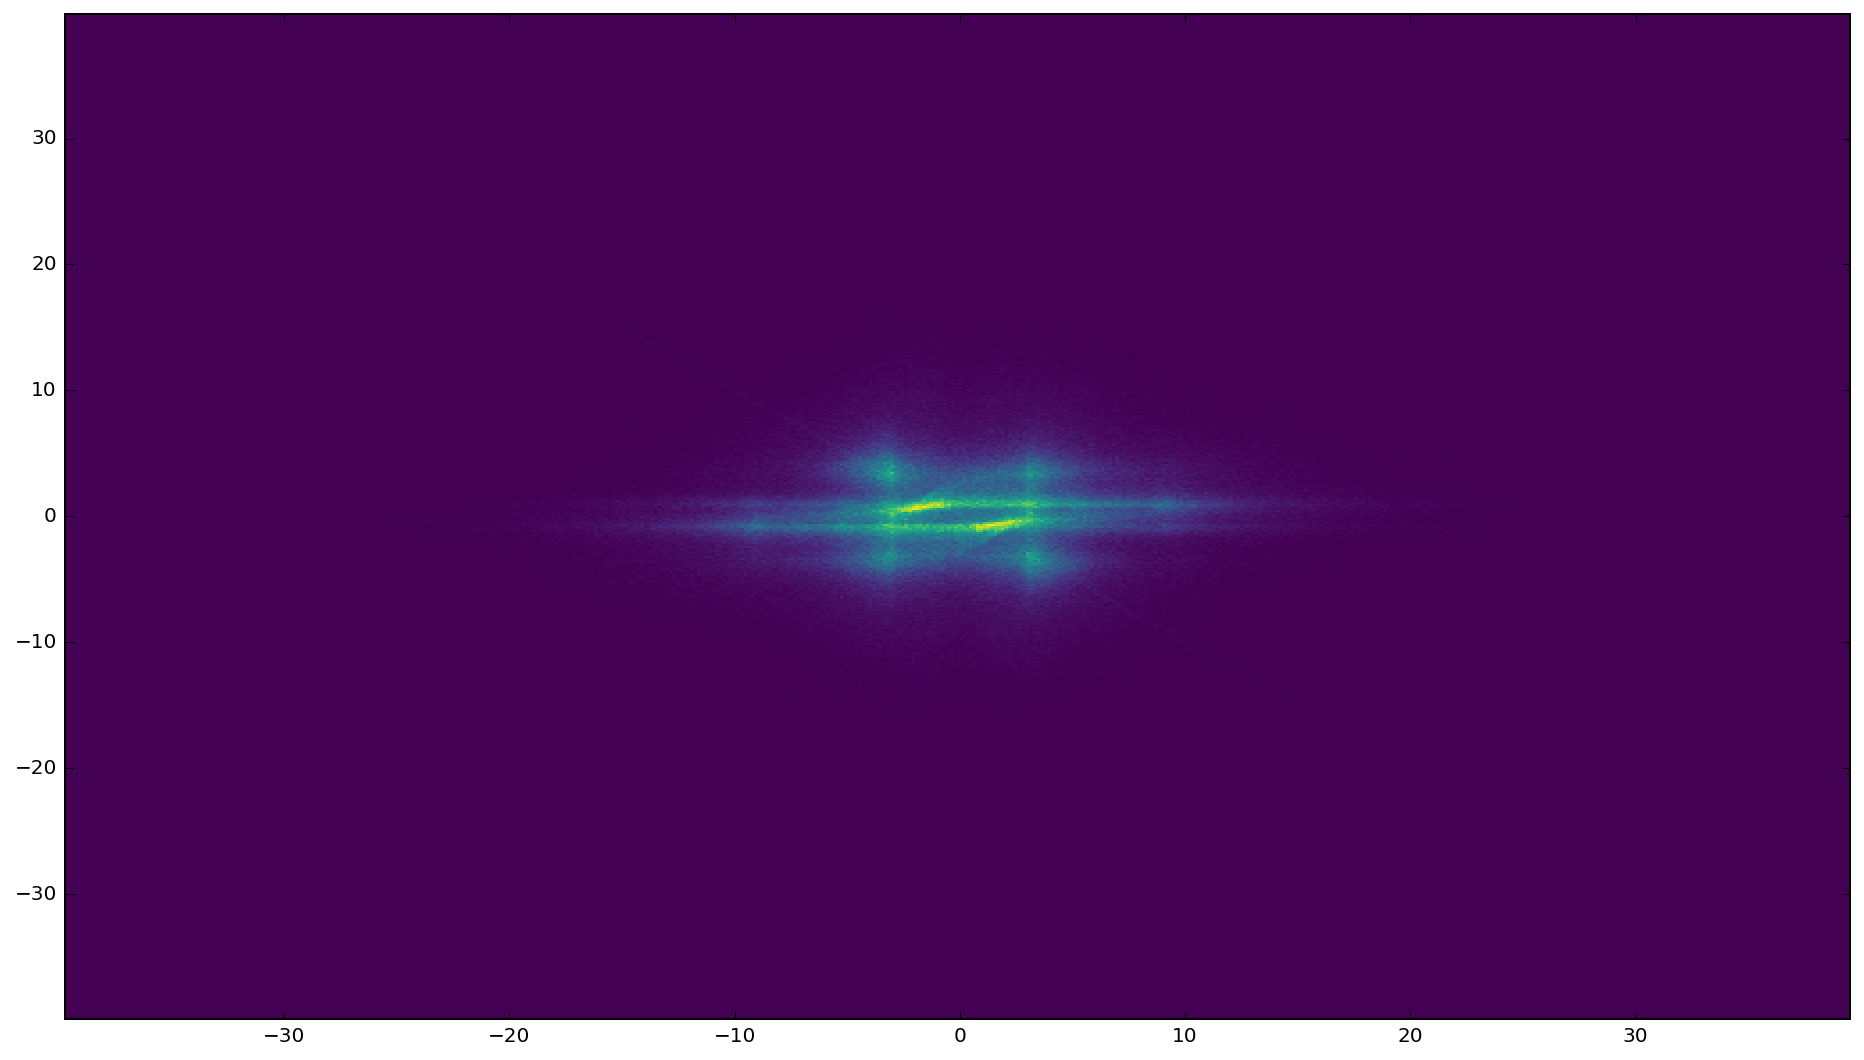

In [9]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.px1,muon.px2,bins=500,cmap='viridis')
plt.show()

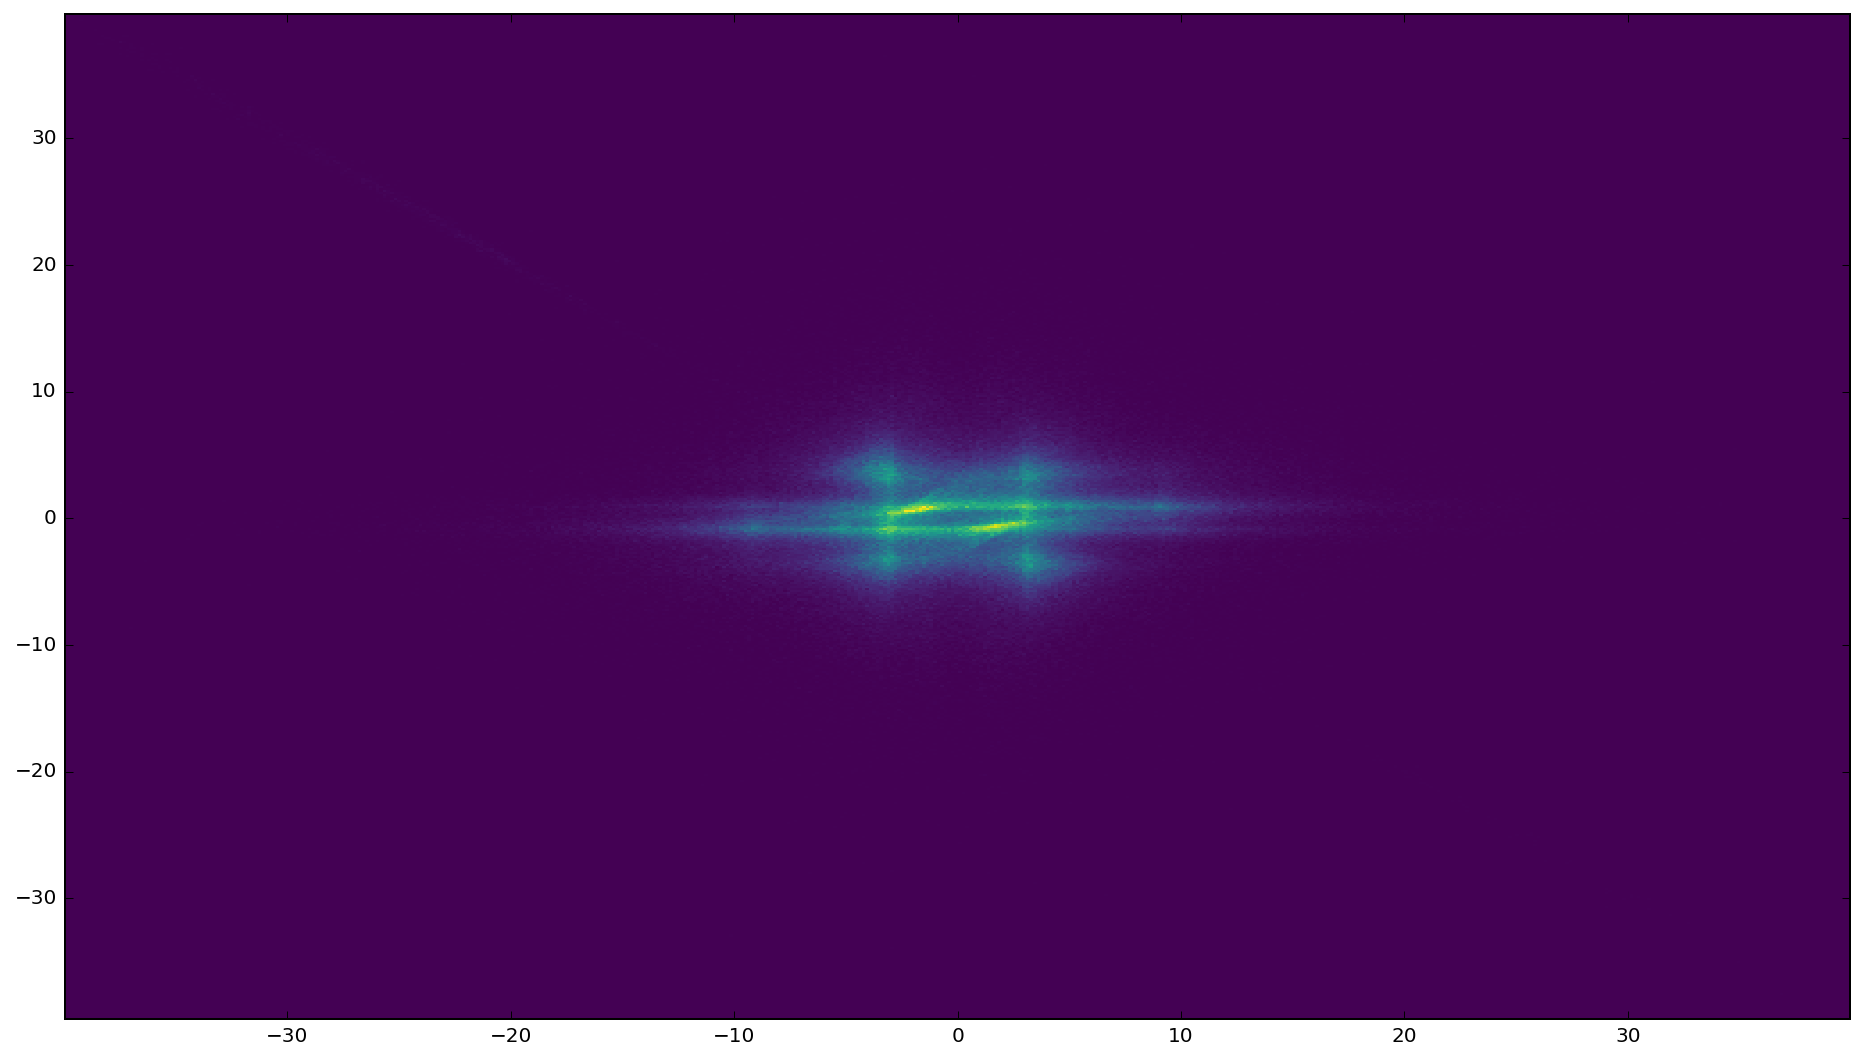

In [10]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.py1,muon.py2,bins=500,cmap='viridis')
plt.show()

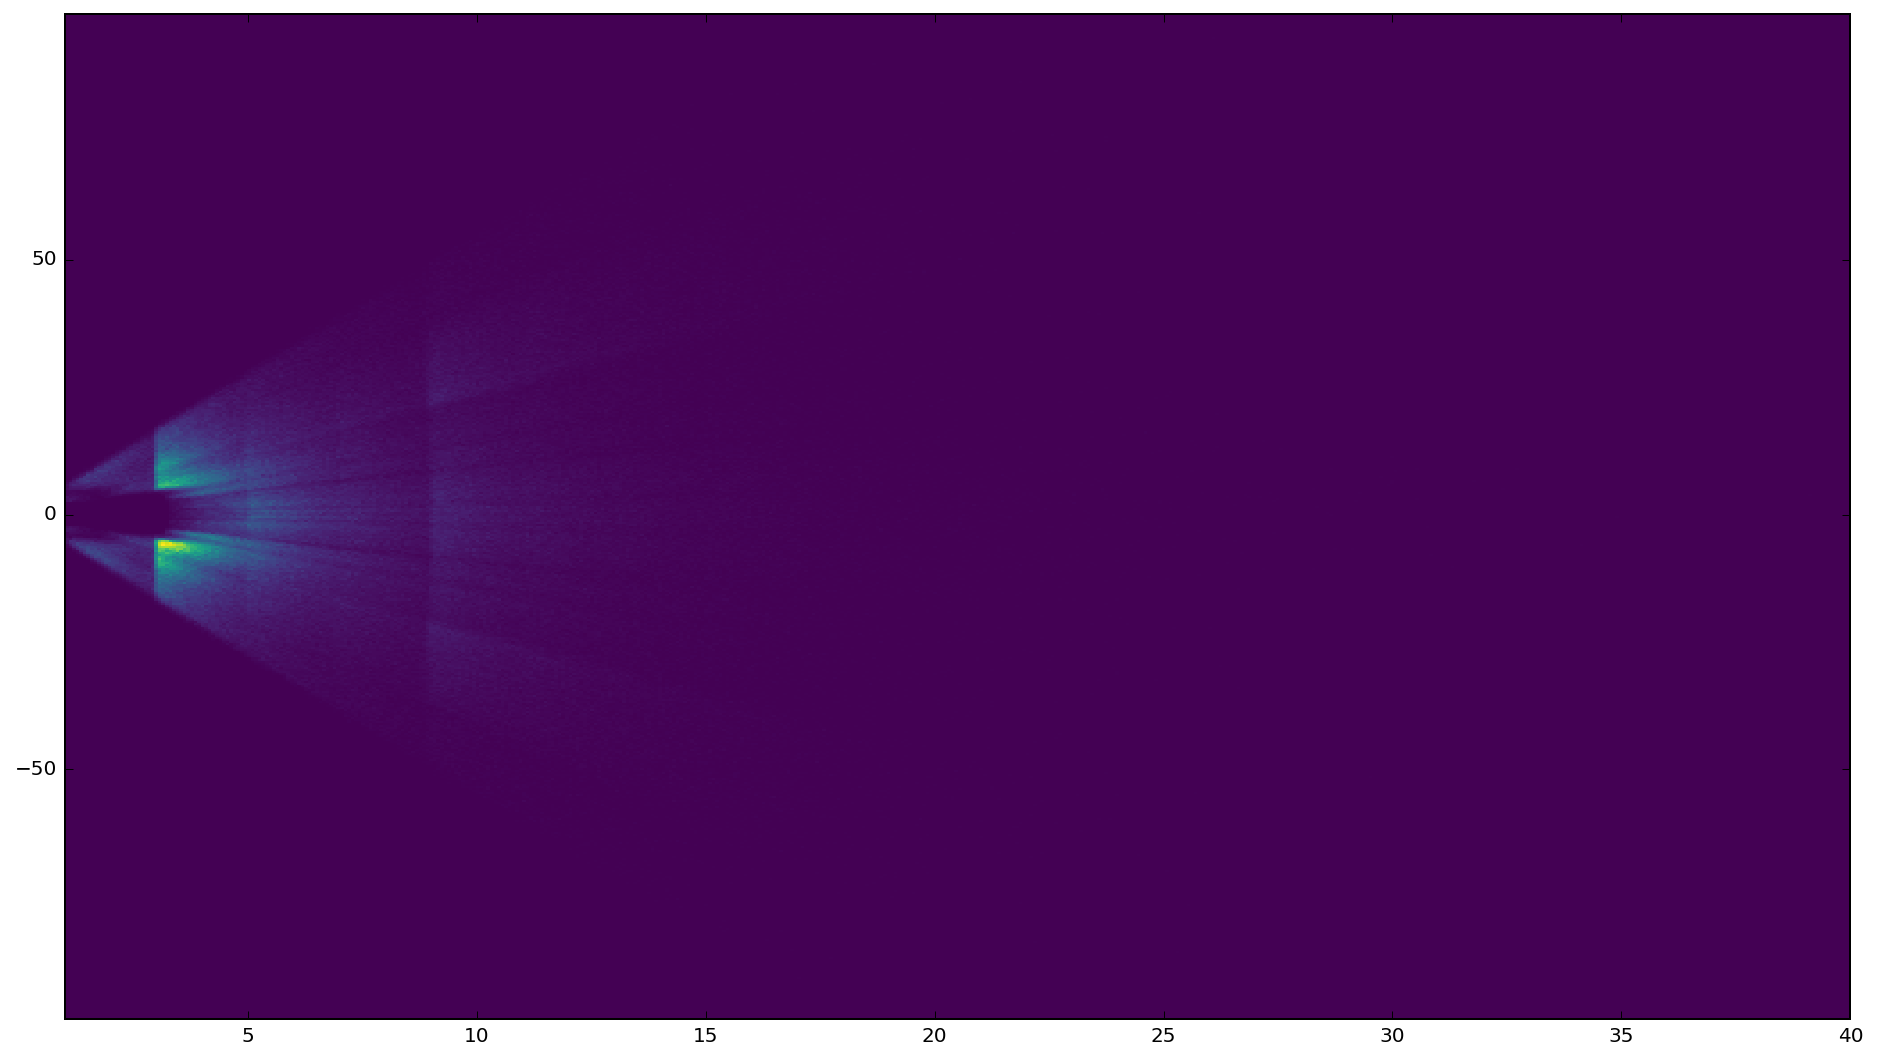

In [11]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.pt1,muon.pz1,bins=500,cmap='viridis')
plt.show()

In [12]:
#ax = scatter_matrix(muon, alpha=0.2, figsize=(20, 15),diagonal='kde')

In [13]:
muon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015070 entries, 0 to 1024590
Data columns (total 15 columns):
E1      1015070 non-null float64
px1     1015070 non-null float64
py1     1015070 non-null float64
pz1     1015070 non-null float64
pt1     1015070 non-null float64
eta1    1015070 non-null float64
phi1    1015070 non-null float64
E2      1015070 non-null float64
px2     1015070 non-null float64
py2     1015070 non-null float64
pz2     1015070 non-null float64
pt2     1015070 non-null float64
eta2    1015070 non-null float64
phi2    1015070 non-null float64
M       1015070 non-null float64
dtypes: float64(15)
memory usage: 123.9 MB


In [14]:
muon.describe()

,E1,px1,py1,pz1,pt1,eta1,phi1,E2,px2,py2,pz2,pt2,eta2,phi2,M
count,1.015070e+06,1.015070e+06,1.015070e+06,1.015070e+06,1.015070e+06,1.015070e+06,1.015070e+06,1.015070e+06,1.015070e+06,1.015070e+06,1.015070e+06,1.015070e+06,1.015070e+06,1.015070e+06,1.015070e+06
mean,1.704551e+01,-4.939158e-02,-1.516242e-01,-8.614008e-01,7.310721e+00,-1.143042e-01,-3.236484e-02,8.608751e+00,1.777407e-02,1.247613e-01,7.711759e-01,4.627991e+00,1.076342e-01,2.435835e-02,9.675184e+00
std,1.290628e+01,6.078680e+00,6.247548e+00,1.950284e+01,4.749836e+00,1.509586e+00,1.819881e+00,6.810428e+00,4.167110e+00,4.359632e+00,9.137814e+00,3.868948e+00,1.422372e+00,1.813081e+00,8.539441e+00
min,2.617420e+00,-3.973960e+01,-3.996340e+01,-9.887040e+01,1.000110e+00,-2.807100e+00,-3.141590e+00,2.502240e+00,-3.991030e+01,-3.949840e+01,-9.784820e+01,5.278860e-01,-2.664180e+00,-3.141590e+00,2.000000e+00
25%,8.528170e+00,-3.601650e+00,-3.672842e+00,-1.105330e+01,3.975800e+00,-1.527230e+00,-1.621025e+00,4.714212e+00,-2.112440e+00,-2.023600e+00,-4.189158e+00,1.872327e+00,-1.151887e+00,-1.542640e+00,3.129490e+00
50%,1.268280e+01,-5.703030e-02,-1.509405e-01,-2.078410e+00,5.746870e+00,-2.758765e-01,-5.794660e-02,6.515685e+00,-4.679710e-03,5.164190e-02,9.761280e-01,3.997445e+00,1.722810e-01,4.060420e-02,7.714720e+00
75%,2.072965e+01,3.529148e+00,3.482527e+00,9.673512e+00,9.508678e+00,1.384480e+00,1.539830e+00,9.875487e+00,2.159778e+00,2.212438e+00,5.276698e+00,5.655745e+00,1.420140e+00,1.601238e+00,1.297437e+01
max,9.999840e+01,3.953380e+01,3.995750e+01,9.812900e+01,3.999730e+01,2.689350e+00,3.141580e+00,9.959350e+01,3.987630e+01,3.978230e+01,9.665450e+01,3.999060e+01,2.713650e+00,3.141590e+00,1.099090e+02


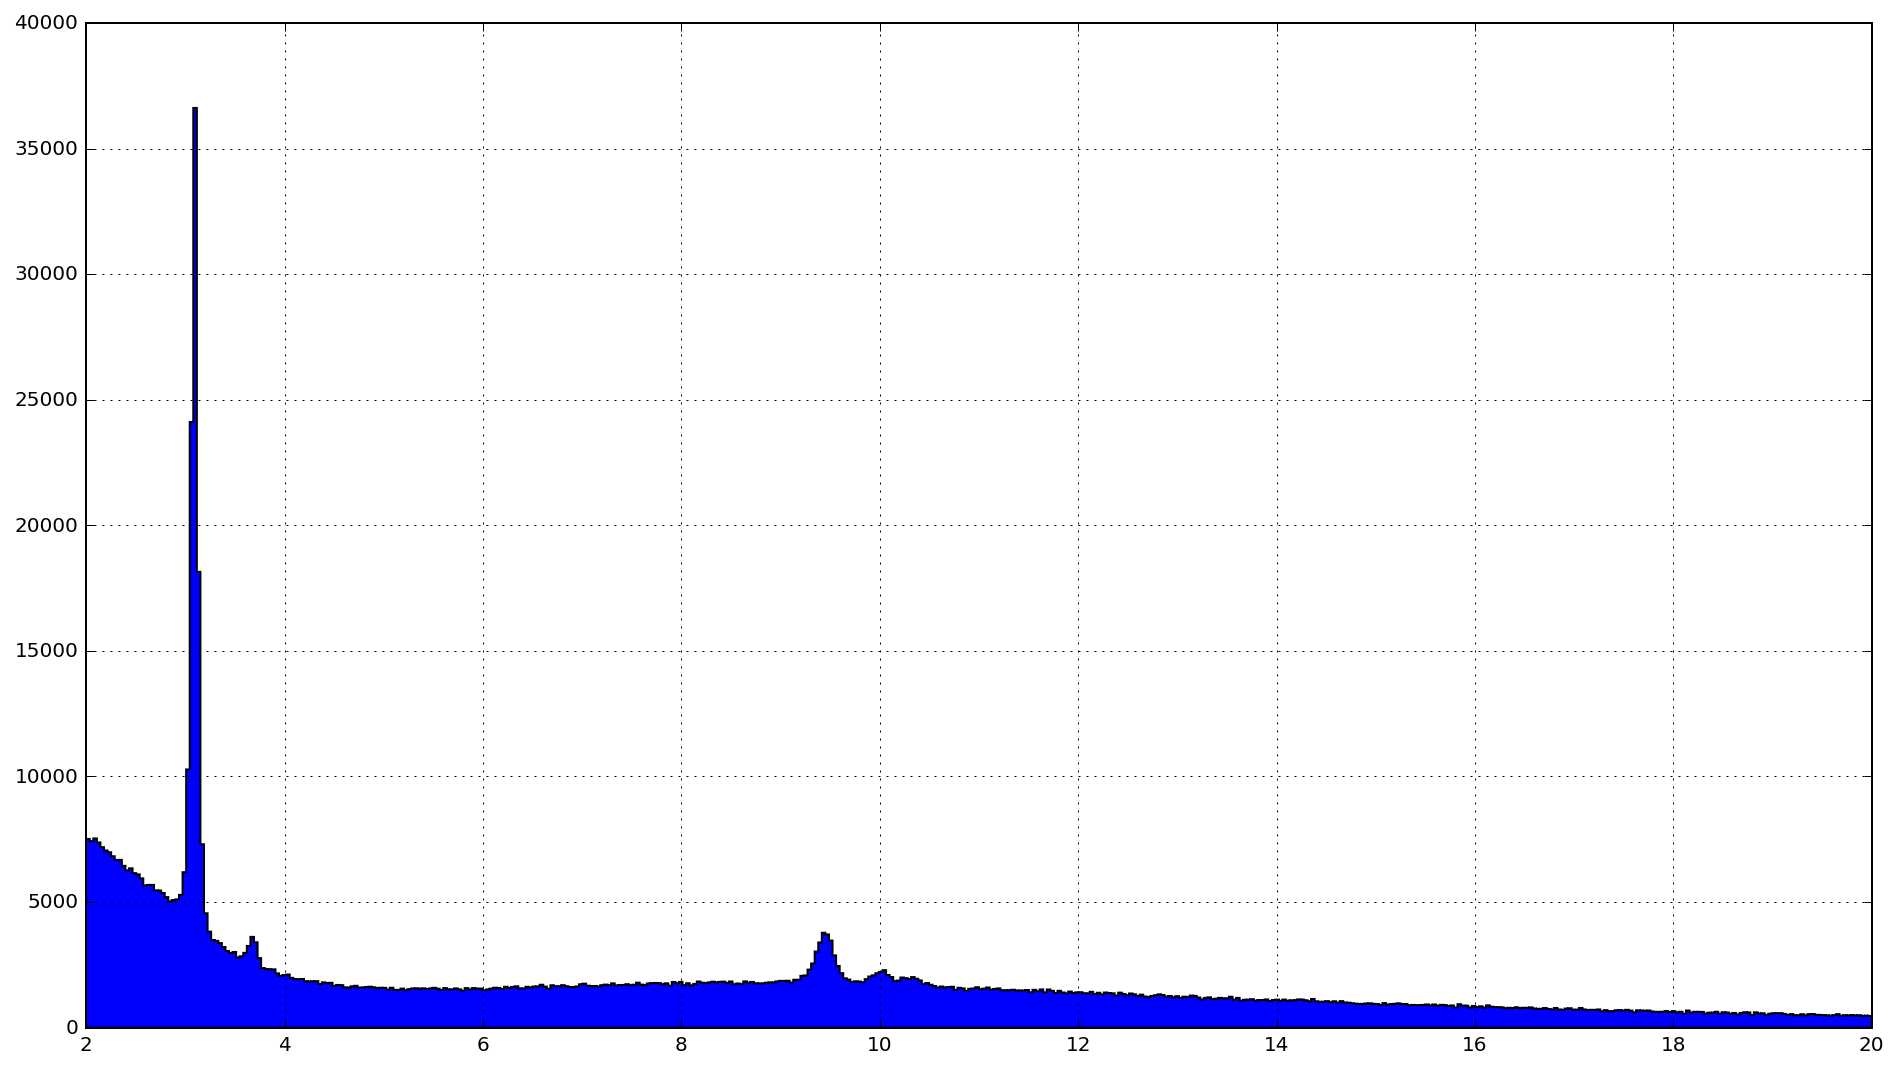

In [15]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon[muon.M < 20].M.hist(bins=500,histtype=u'stepfilled')

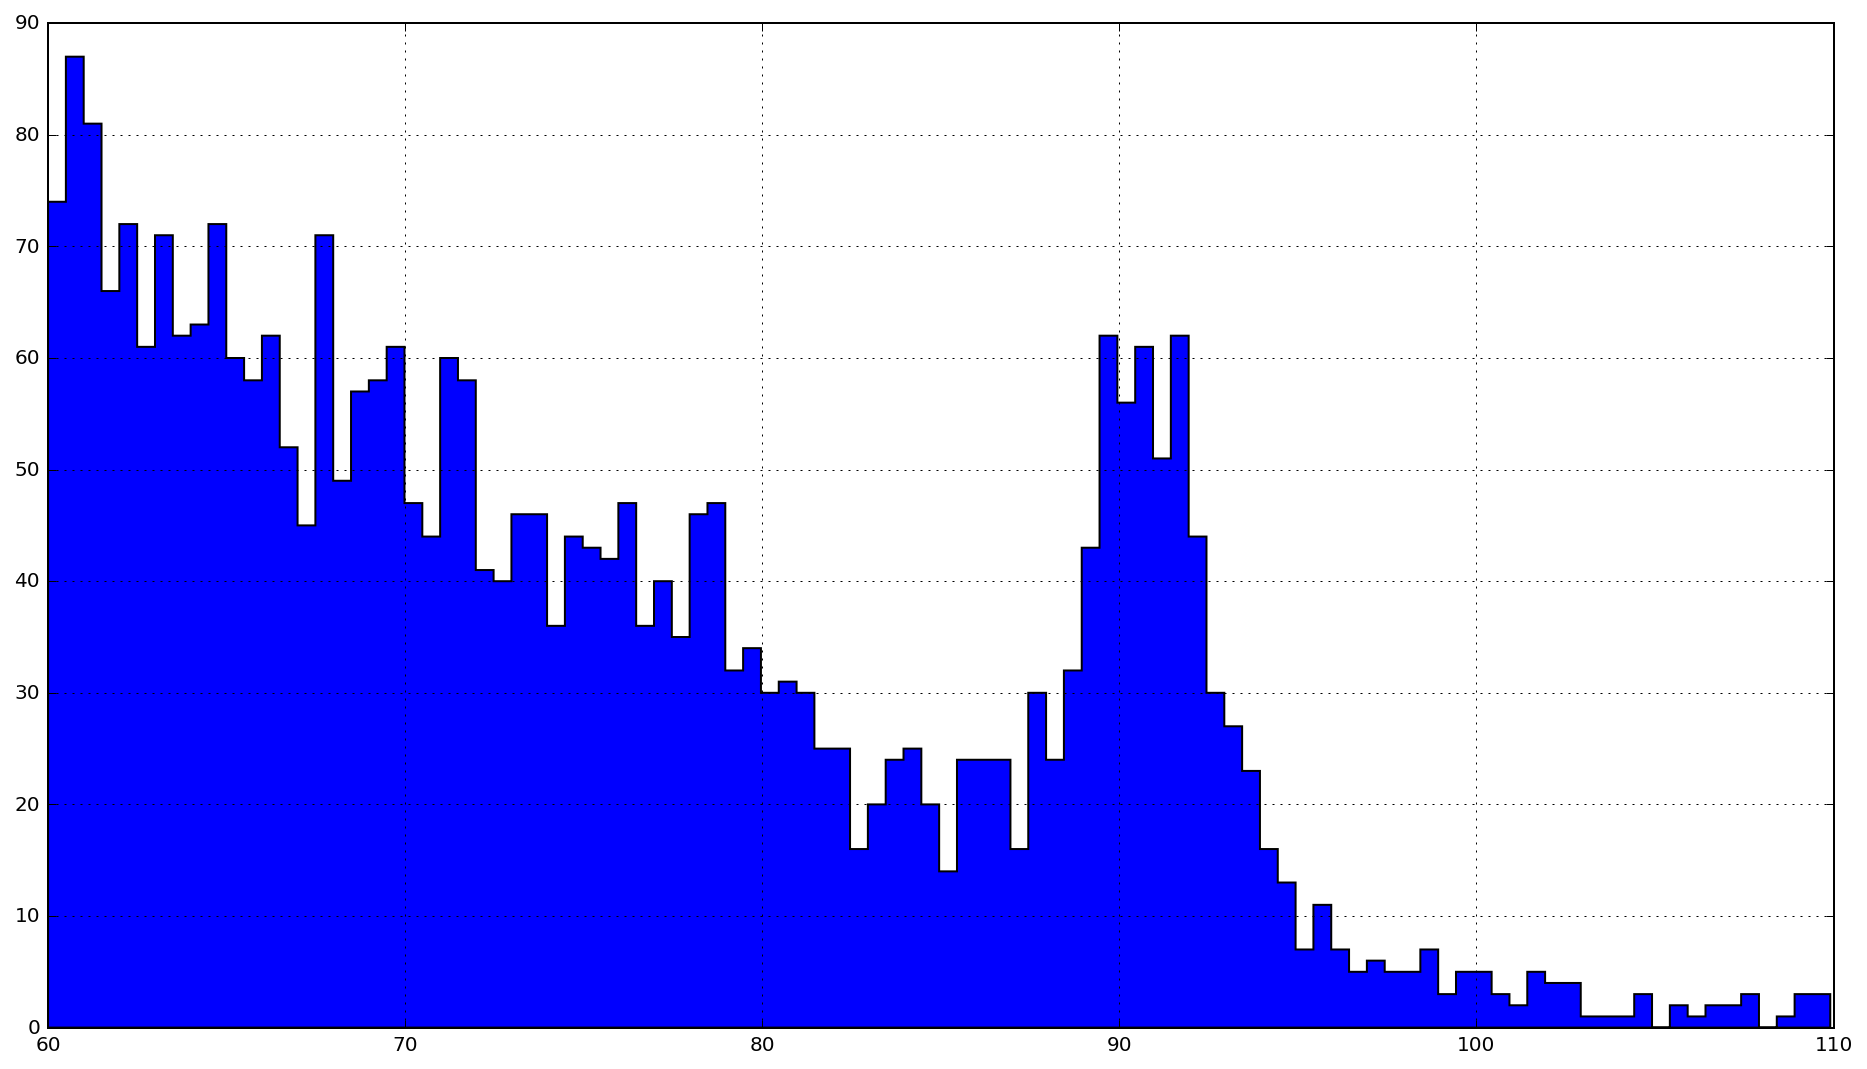

In [16]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon[muon.M > 60].M.hist(bins=100,histtype=u'stepfilled')

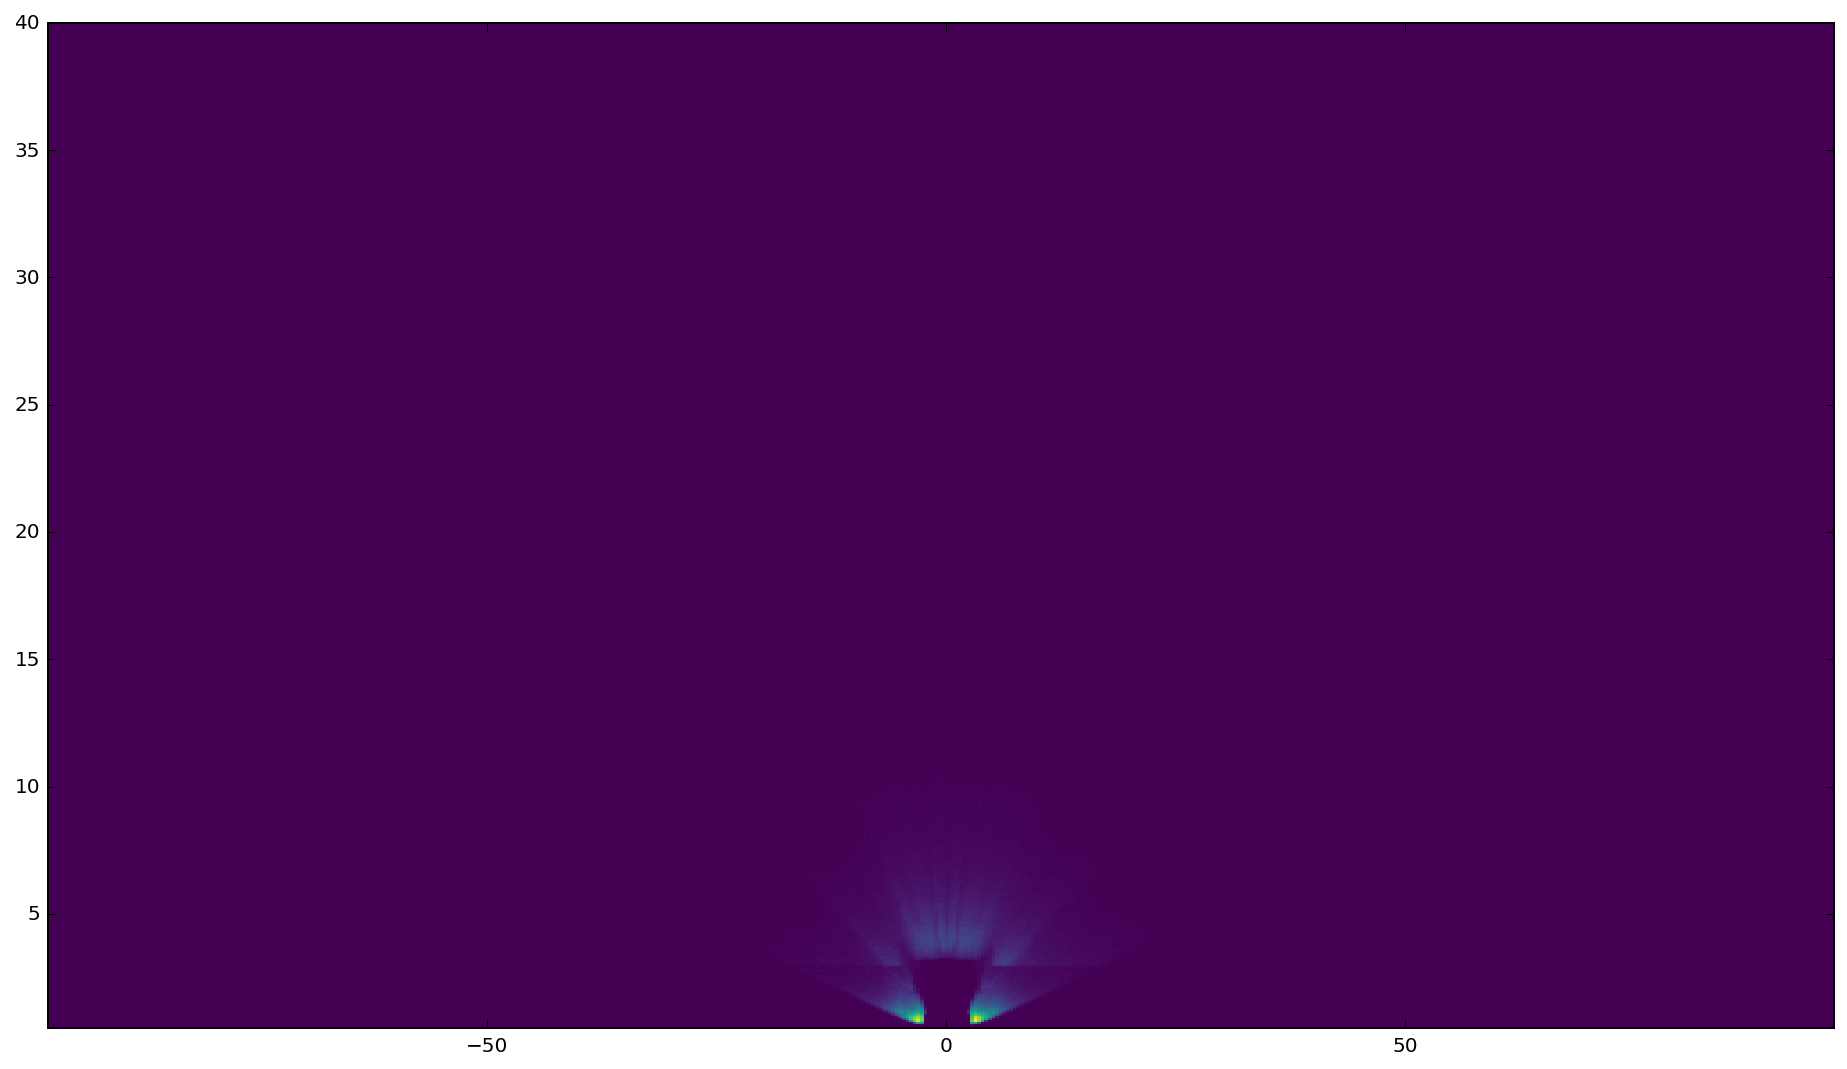

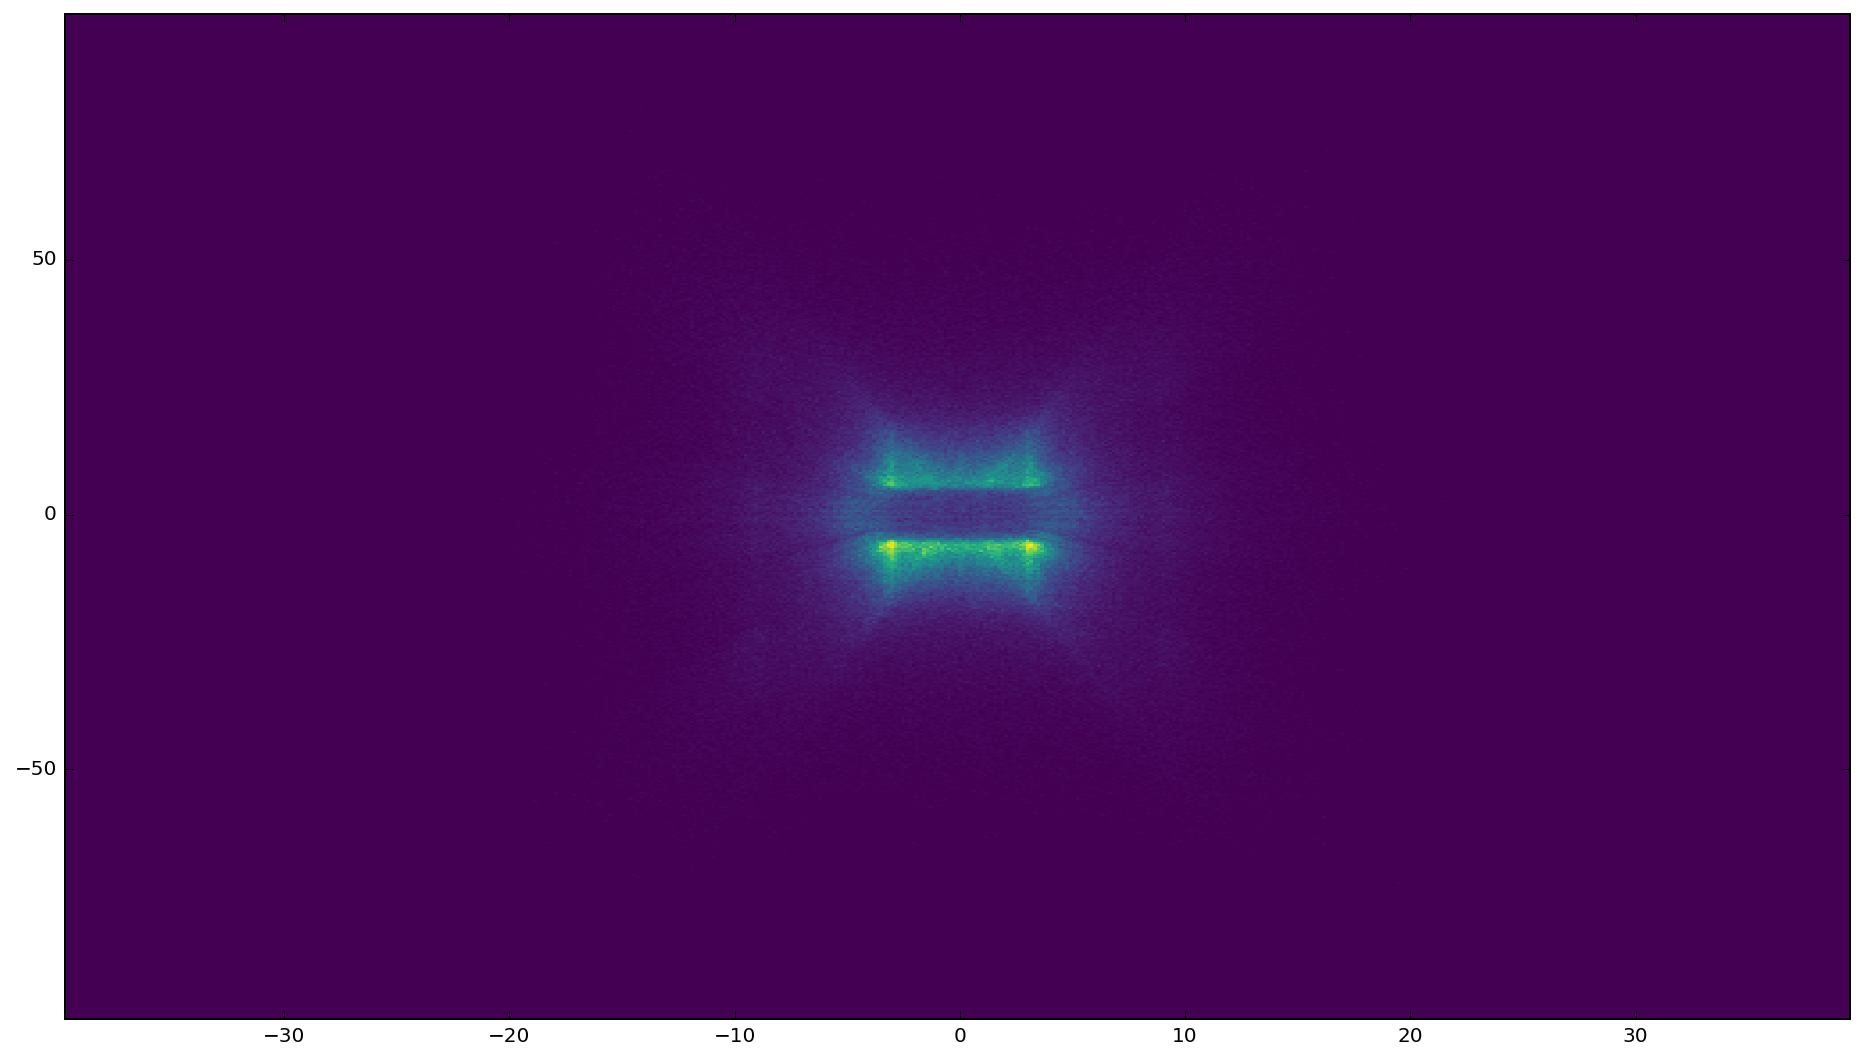

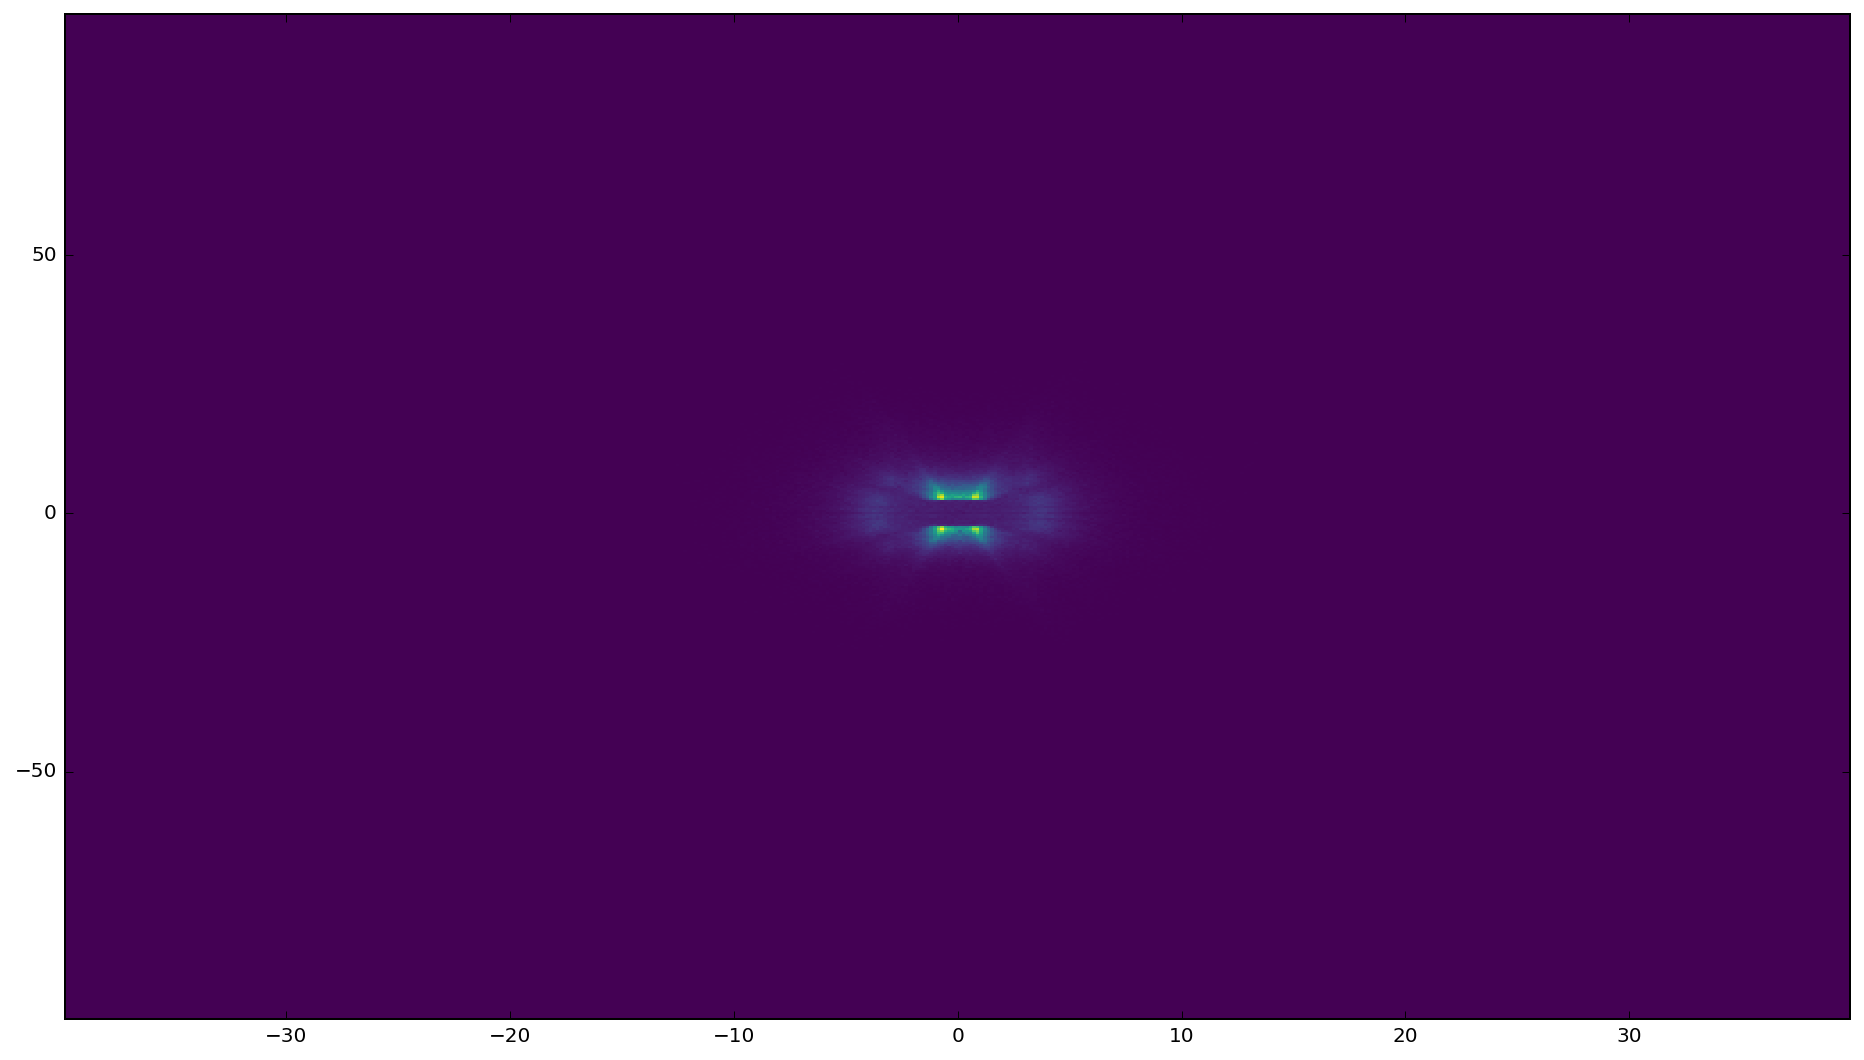

In [17]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.pz2,muon.pt2,bins=500,cmap='viridis')
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.px1,muon.pz1,bins=500,cmap='viridis')
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.px2,muon.pz2,bins=500,cmap='viridis')
plt.show()

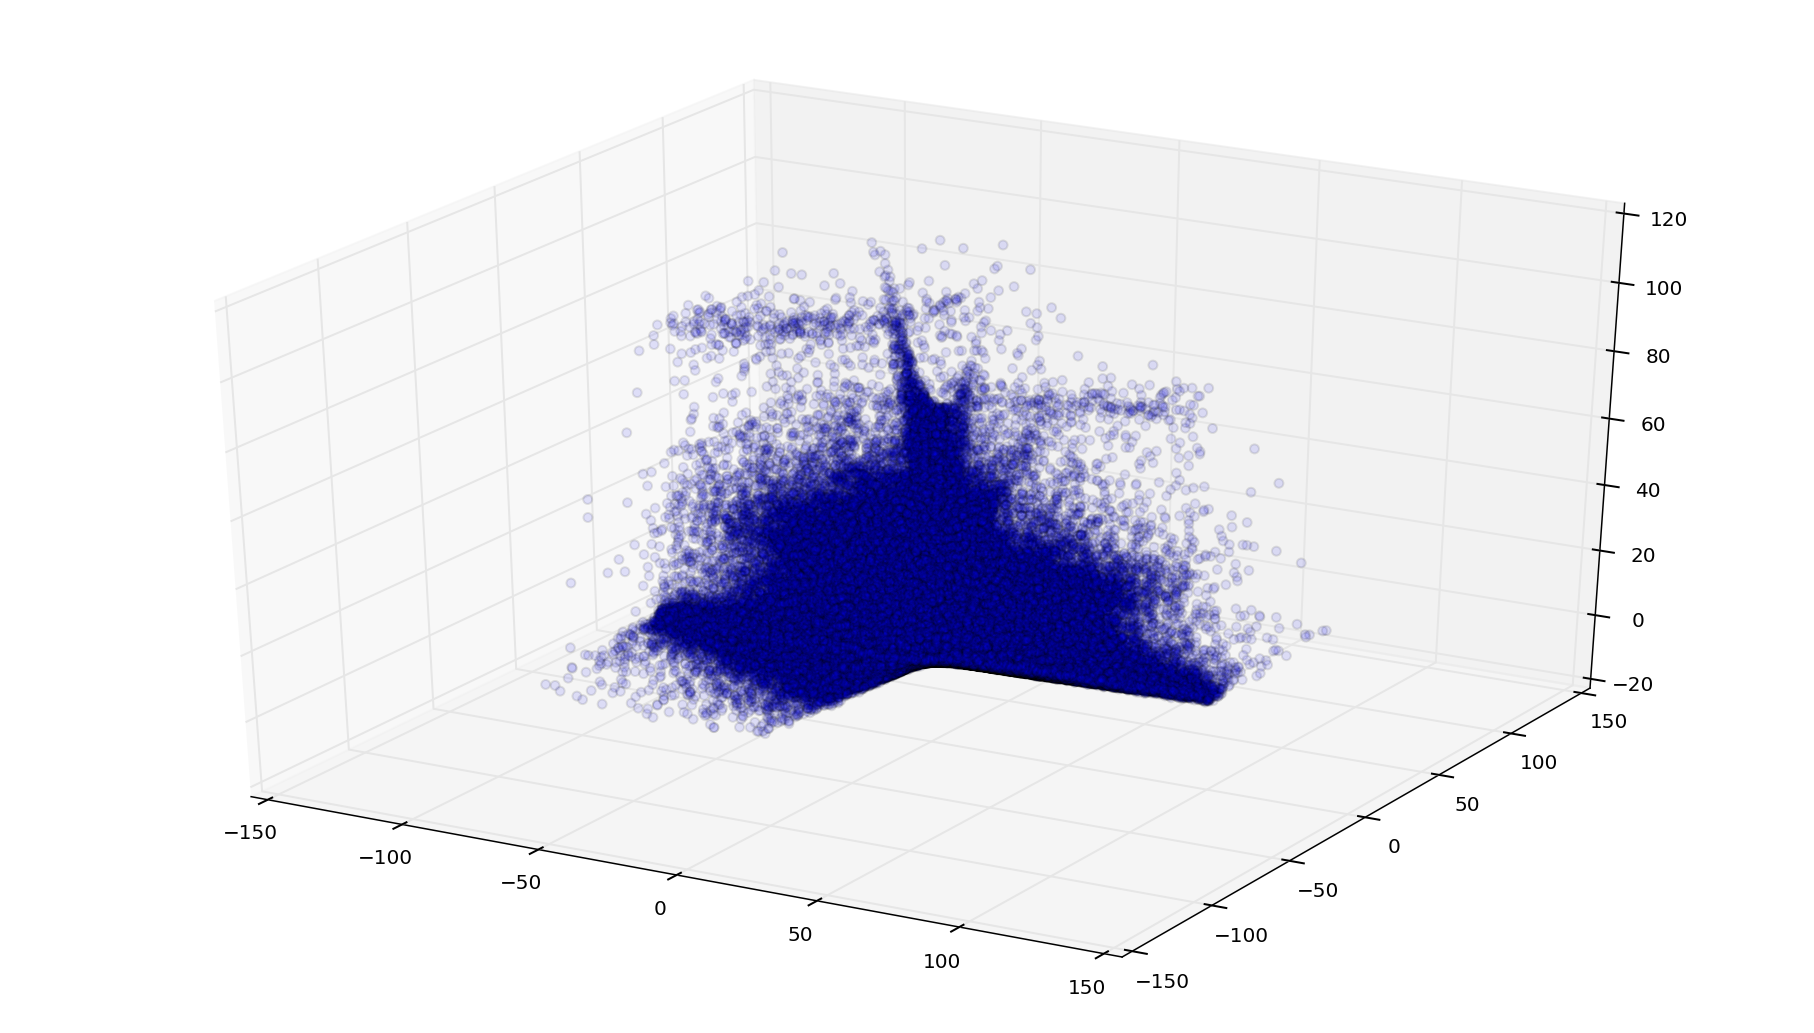

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

#mus = muon.T
#uniq_mus = np.unique(mus)
#values = cm.viridis(np.linspace(0,1,len(uniq_mus)))
#values = cm.Paired(np.linspace(0,1,len(uniq_mom)))
#col = dict(zip(uniq_mus, values))


#for mu in uniq_mus:
#    xs = muon.px1
#    ys = muon.py1
#    zs = muon.pz1
#    ax.scatter(xs, ys, zs,alpha=1,color=col[mu])
ax.scatter(muon.pz1, muon.pz2, muon.M,alpha=0.1)
plt.show()

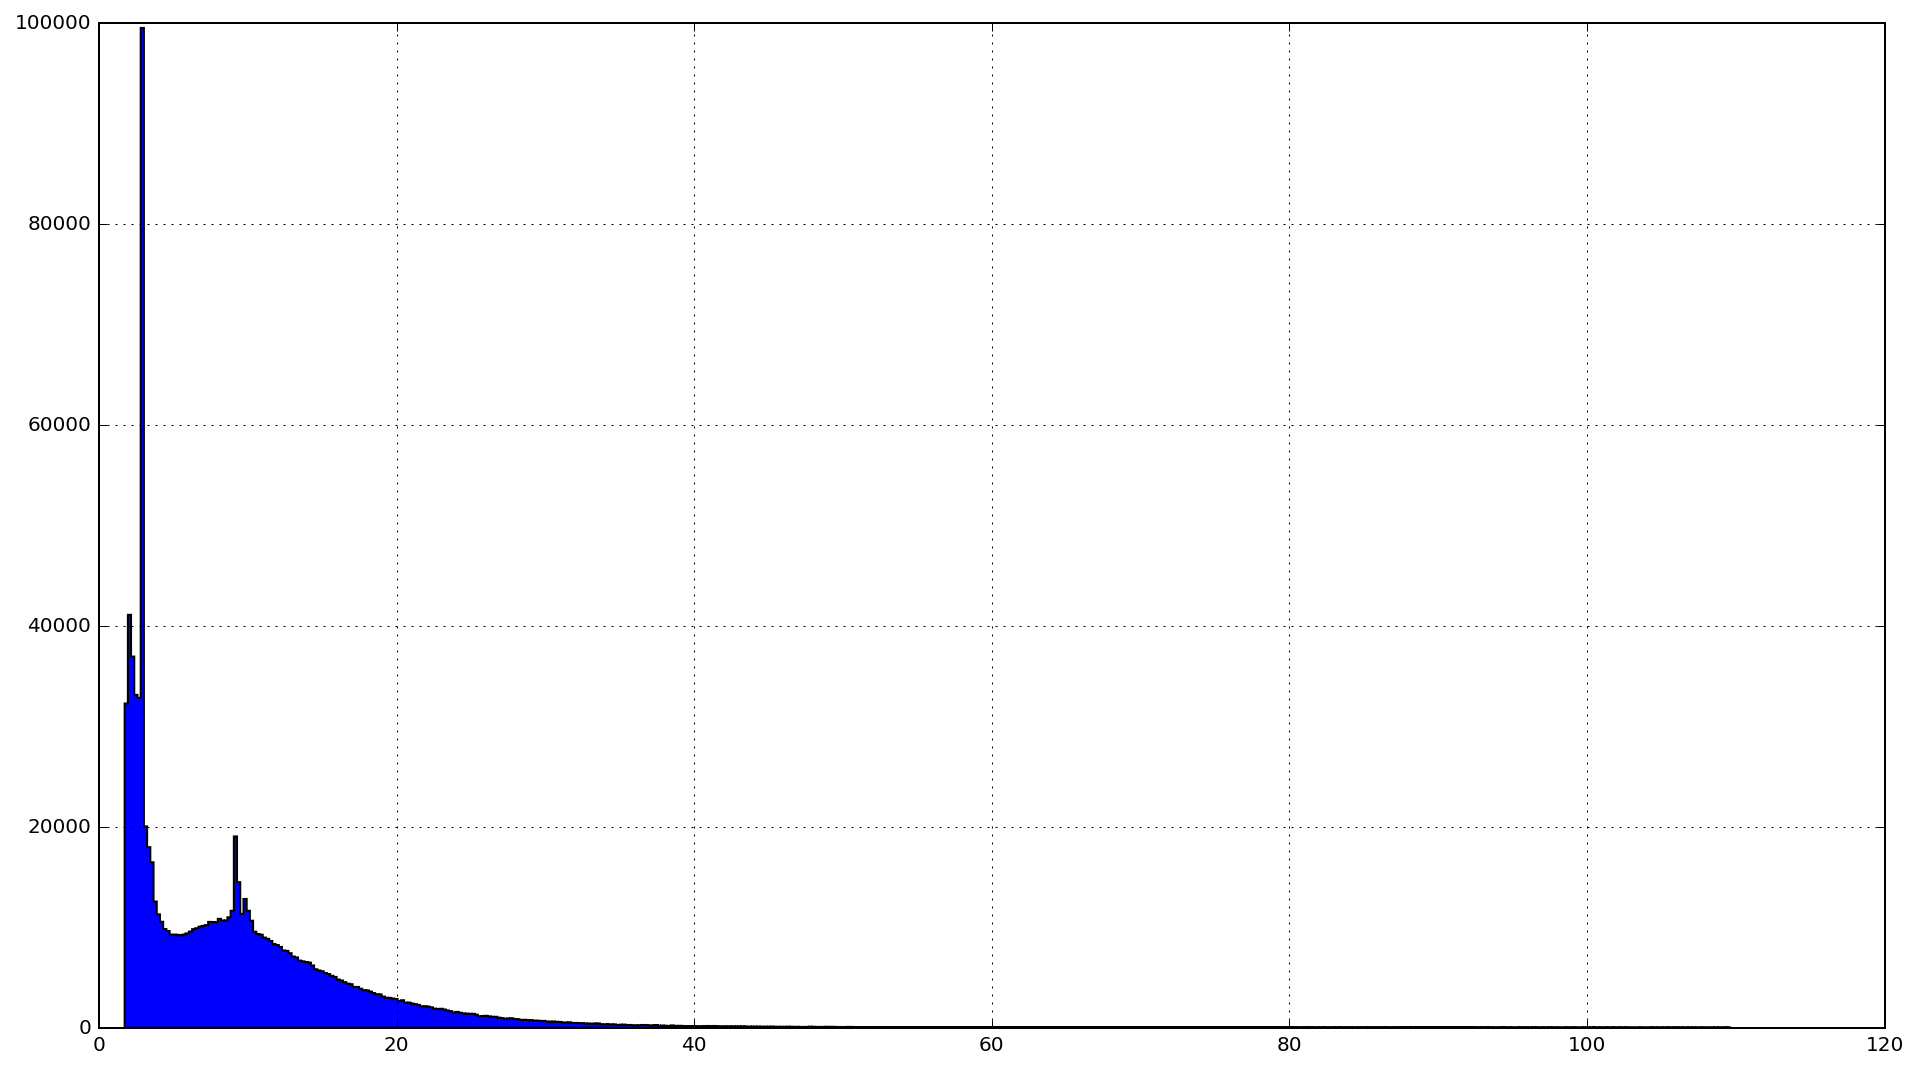

In [45]:
muon['missing'] = (muon.M - muon.mass1 - muon.mass2)

fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon.missing.hist(bins=500,histtype=u'stepfilled')
muon.mass1.hist()
muon.m